# Representación gráfica de las relaciones de dispersión TFG (matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
from typing import List, Tuple
from scipy import constants as const #De aquí puedo obtener las constantes físicas para el w_D
%config InlineBackend.figure_format = 'retina'  # para que se me vean en alta resolución  || tal cual copiado de google no sé que significa

In [173]:
#Parámetros
Ef = 0.63
w_D = 2*Ef*const.alpha
    #Si02
eps_inf_si = 2.1
w_l0_si = 1244*100*const.h*const.c/const.e #en eV
w_t0_si = 105200*const.h*const.c/const.e   #en eV
y_0_si = 0.073*w_l0_si 
    #Al2O3
eps_inf_al = 2.5
w_l0_al = 93600*const.h*const.c/const.e   #en eV
w_t0_al = 77200*const.h*const.c/const.e   #en eV
y_0_al = 0.18*w_l0_al

factor_global= 100*const.h*const.c/const.e #para el eje X

w_t0_si

0.1304313767517267

# Grafeno

## 1. Polaritón plasmónico de grafeno

Relación de dispersión $$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c}{\epsilon_1+\epsilon_2} $$

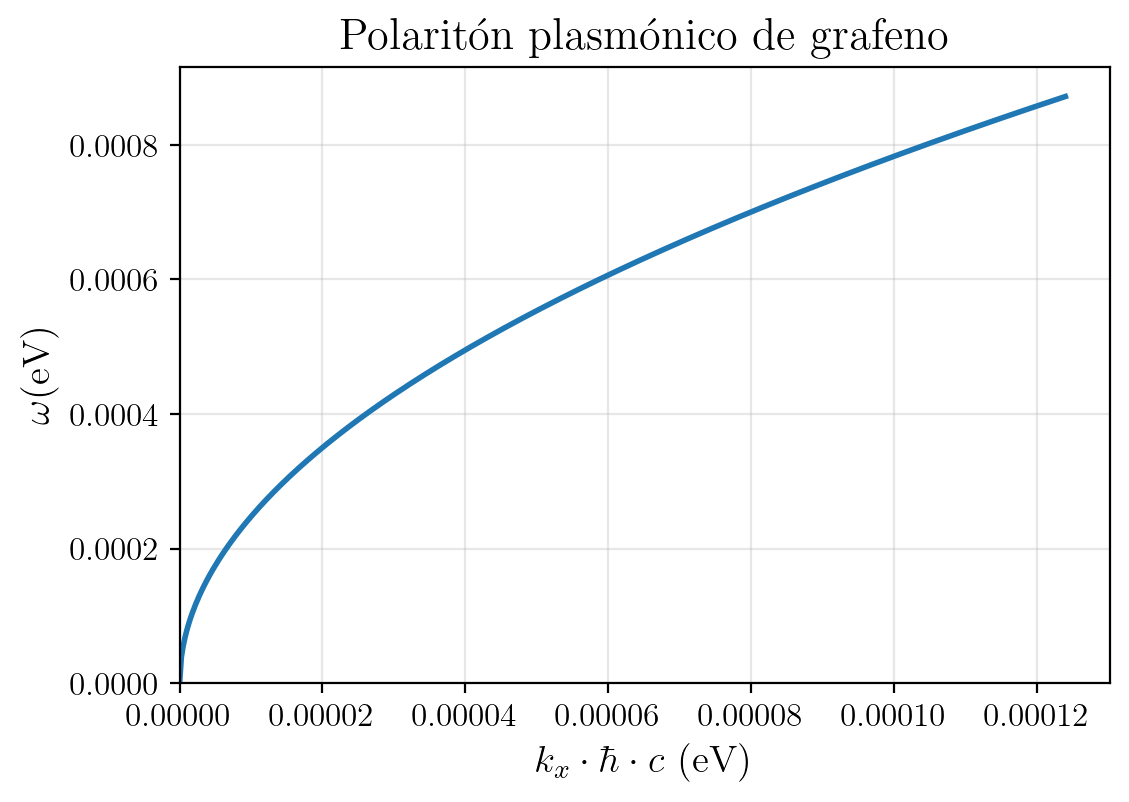

In [38]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,1*factor_global,500)
y = (2*x*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y)

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")


# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Polaritón plasmónico de grafeno: dos monocapas

Relación de dispersión $$w_1^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $$ y $$w_2^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot cosh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $$

Cuando miramos el límite asintótico con $k_x \to \infty$ tenemos que ambas soluciones tenderán a:

$$w_{\infty}^2 = \frac{2\cdot k_x \cdot w_D \cdot c  }{\epsilon_1+\epsilon_2} $$

In [33]:
#Definición de d - parámetro de cuentas
d = 18*1239.84193 #el 18 representa los nanometros

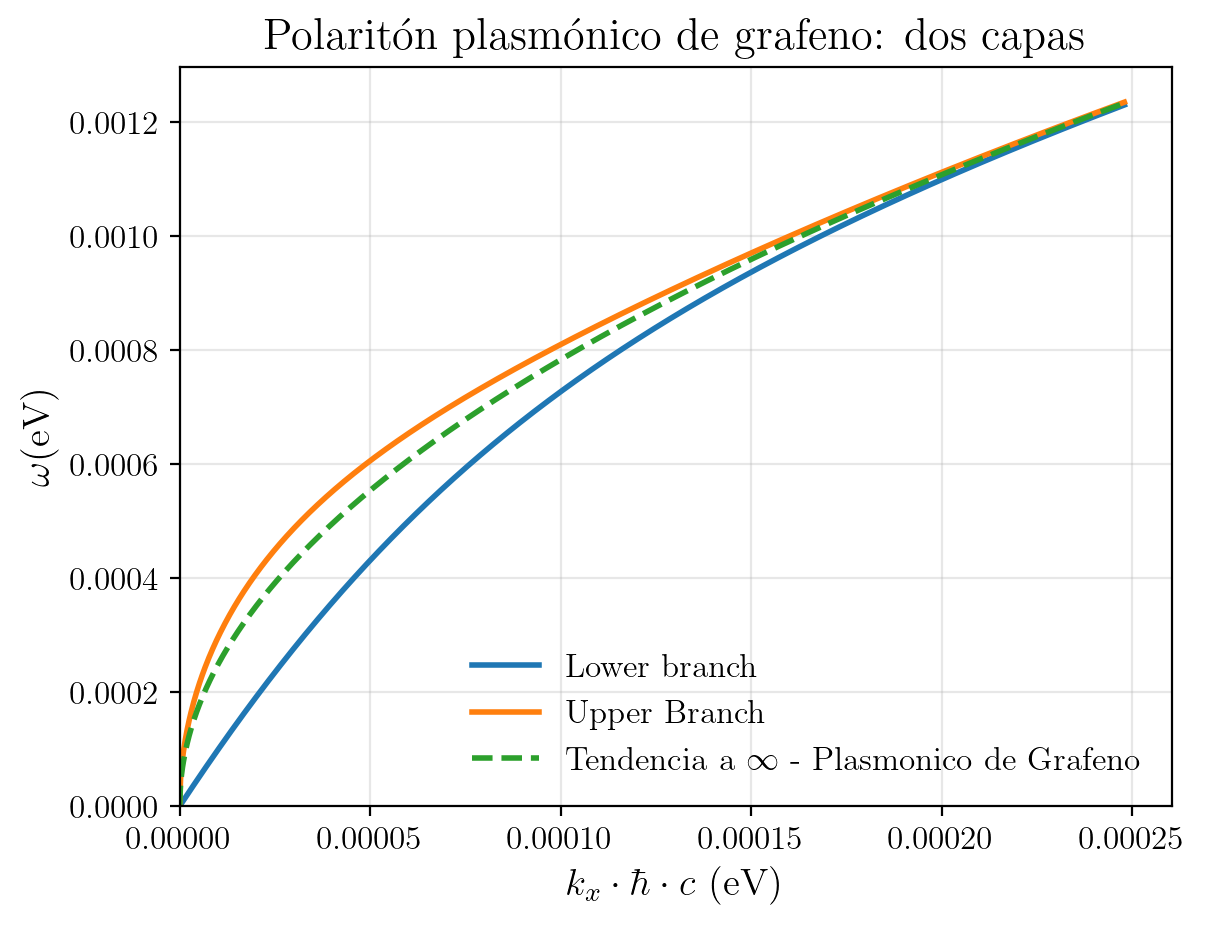

In [40]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno: dos capas") #Título de la gráfica
x = np.linspace(0,2*100*const.h*const.c/const.e,1000)

y_1 = np.sqrt((2*x*w_D*np.sinh(x*d/2)/(1*np.sinh(x*d/2)+2*np.cosh(x*d/2)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
y_2 = np.sqrt((2*x*w_D*np.cosh(x*d/2)/(1*np.sinh(x*d/2)+2*np.cosh(x*d/2)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='Lower branch')
ax.plot(x,y_2,label='Upper Branch')
y = (2*x*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y,label='Tendencia a $\infty$ - Plasmonico de Grafeno', linestyle = '--')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="lower right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 3. Polaritón plasmónico de grafeno acústico I

Relación de dispersión $$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x)}{\epsilon_1senh(d\cdot k_x)+\epsilon_2cosh(d\cdot k_x)}$$

Cuando tiende $k_x \to \infty$ nuevamente
$$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c  Polaritón plasmónico de grafeno: dos monocapas}{\epsilon_1+\epsilon_2}$$

In [35]:
#Definición de d - parámetro de cuentas
d = 18*1239.84193 #el 18 representa los nanometros

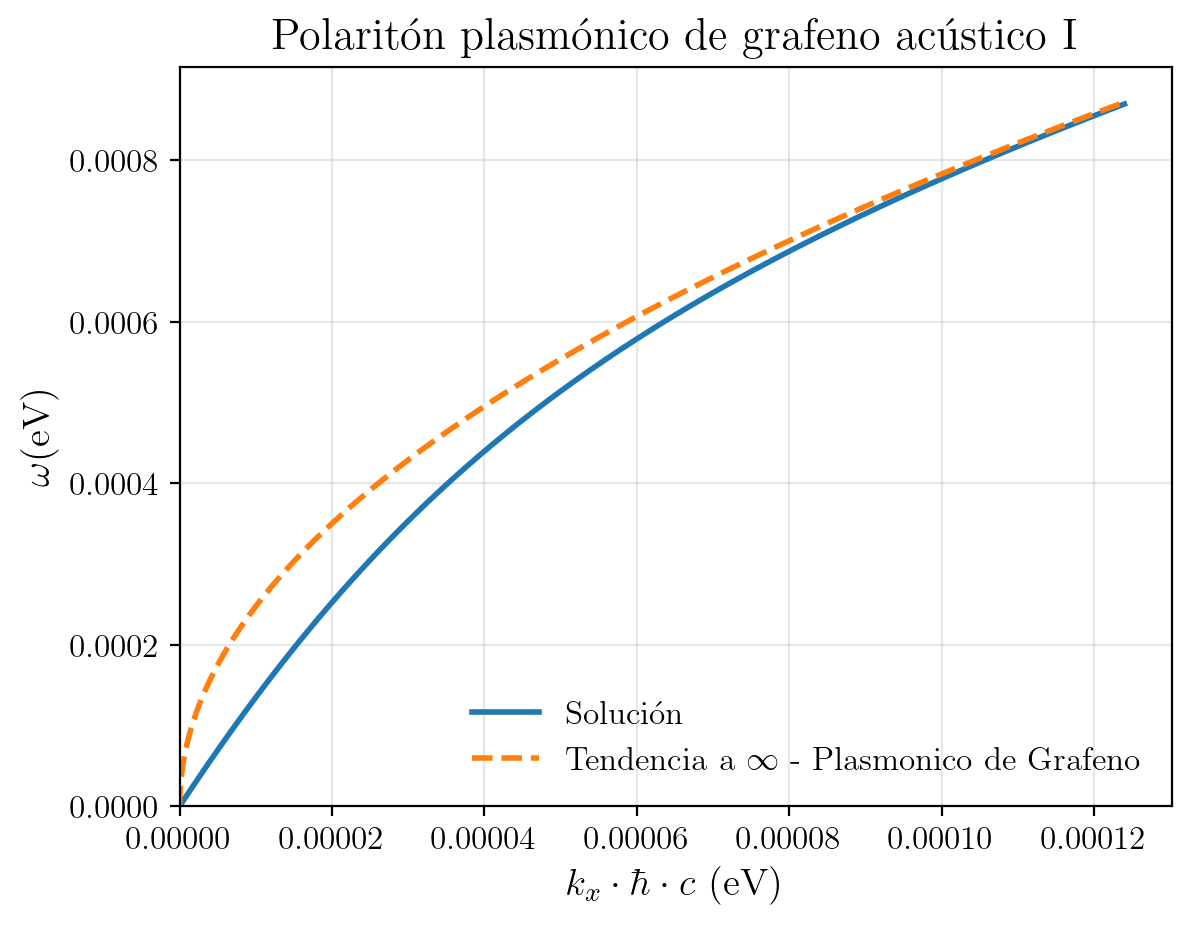

In [42]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico I") #Título de la gráfica
x = np.linspace(0,1*100*const.h*const.c/const.e,3000)
y_1 = np.sqrt((2*x*w_D*np.sinh(x*d)/(1*np.sinh(x*d)+2*np.cosh(x*d)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='Solución')
y = (2*x*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y,label='Tendencia a $\infty$ - Plasmonico de Grafeno', linestyle = '--')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="lower right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 4. Polaritón plasmónico de grafeno acústico II

Relación de dispersión 

$$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) -\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$$


$$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) +\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$$

Hay algún comportamiento extraño cuando las h_2 $\neq$ h_3. Hay que revisar.

También notar que cuando hamos el límite con d$\to 0$ y $\epsilon_2 \to 1$ obtenemos que una expresión es 0, y la otra es:

$$w^2 = \frac{4ck_xw_D sinh(h_3k_x)}{\epsilon_3cosh(h_3k_x)+\epsilon_1sinh(h_3k_x)}$$

Hay un factor raíz de dos respecto a la relación de dispersión vista en el apartado #3



### Límite asintótico $k_x \to \infty$

Para \(h_2>0,\, h_3>0\), usando \(\cosh(a k_x)\sim \sinh(a k_x)\sim \tfrac12 e^{a k_x}\), se obtiene

$$
w^2 \;=\;
\frac{2 c\, w_D\, k_x}{2(\epsilon_1+\epsilon_2)(\epsilon_2+\epsilon_3)}
\Big[(\epsilon_1+\epsilon_2)+(\epsilon_2+\epsilon_3)\mp\big|(\epsilon_1+\epsilon_2)-(\epsilon_2+\epsilon_3)\big|\Big].
$$

Definiendo $a=\epsilon_1+\epsilon_2$ y $b=\epsilon_2+\epsilon_3$, el corchete es $(a+b)\mp|a-b|$, de donde salen las dos ramas:

$$
\boxed{\,w^2 \to \frac{2 c\, w_D\, k_x}{\epsilon_1+\epsilon_2}\,}
\qquad\text{y}\qquad
\boxed{\,w^2 \to \frac{2 c\, w_D\, k_x}{\epsilon_2+\epsilon_3}\,}
$$

Si $\epsilon_1=\epsilon_3$, ambas coinciden:
$$
w^2 \to \frac{2 c\, w_D\, k_x}{\epsilon_1+\epsilon_2}
$$


In [28]:
#Definición de h_2 y h_3 - parámetro de cuentas
h_2 = 20*1239.84193 #el 5 representa los nanometros
h_3 = 20*1239.84193

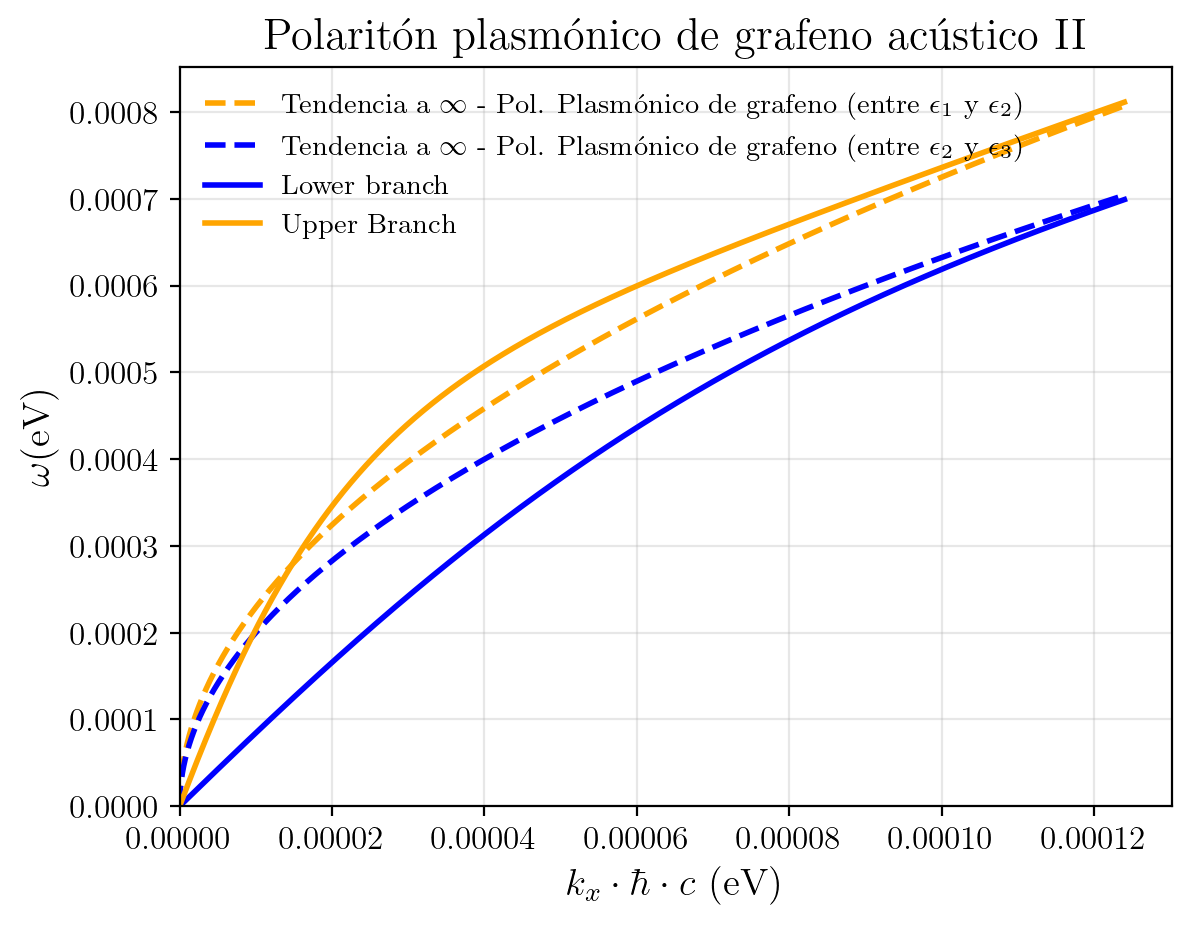

In [67]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})
# Epsilon
epsilon_1 = 1
epsilon_2 = eps_inf_al
epsilon_3 = eps_inf_si


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico II") #Título de la gráfica
x = np.linspace(0,factor_global,3000)
yinf1 = (2*x*w_D/(epsilon_1+epsilon_2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,yinf1,label='Tendencia a $\infty$ - Pol. Plasmónico de grafeno (entre $\epsilon_1$ y $\epsilon_2$)',linestyle='--',color='orange')
yinf2 = (2*x*w_D/(epsilon_3+epsilon_2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,yinf2,label='Tendencia a $\infty$ - Pol. Plasmónico de grafeno (entre $\epsilon_2$ y $\epsilon_3$)',linestyle='--',color='blue')


# Raíz interna
arg_raiz = (
    2 *  x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2* x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)     
ax.plot(x,omega1,label='Lower branch',color='blue')
ax.plot(x,omega2,label='Upper Branch',color='orange')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()


Además, si estamos con que ambos epsilon 2 y 3 son iguales, las dos ramas tenderían a la misma:

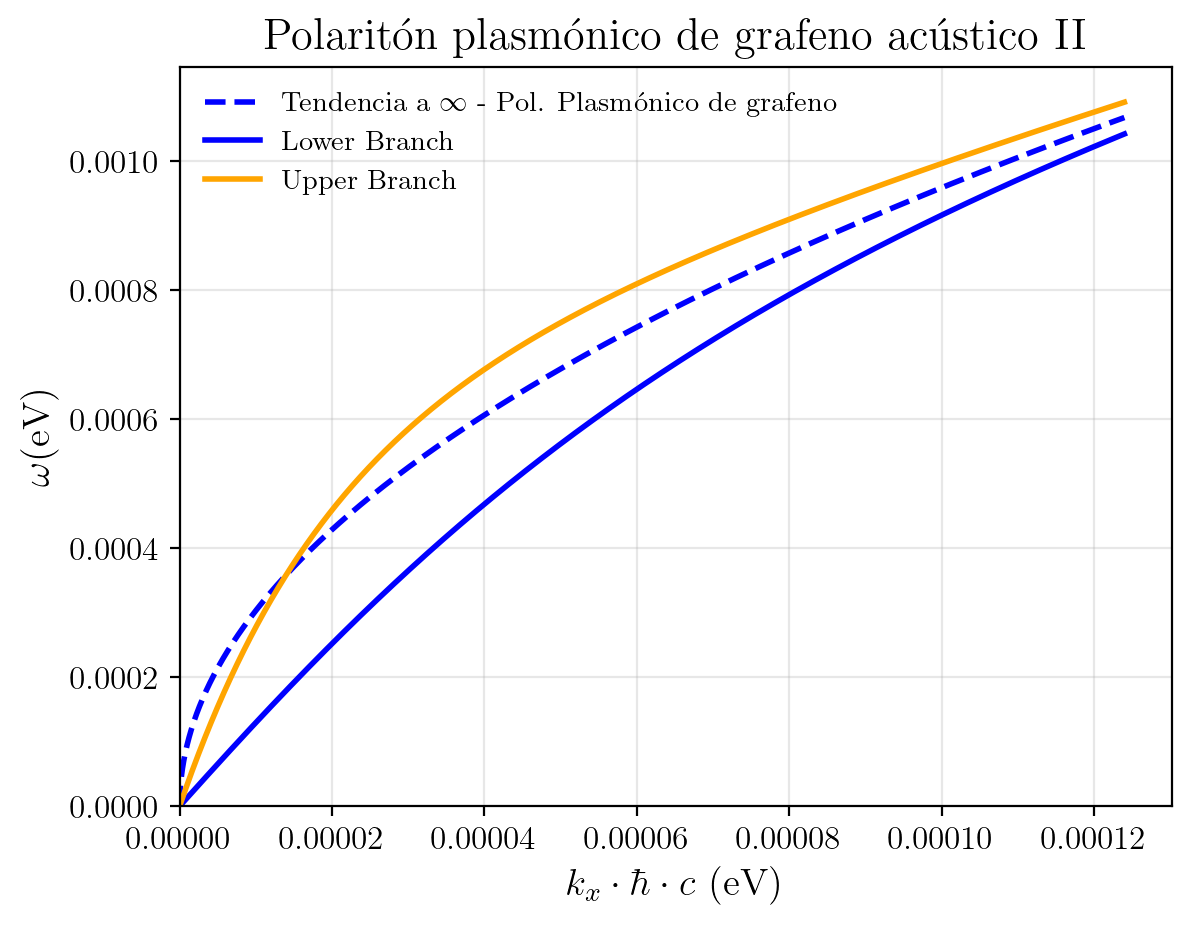

In [66]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})
# Epsilon
epsilon_1 = 1
epsilon_2 = 1
epsilon_3 = 1


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico II") #Título de la gráfica
x = np.linspace(0,factor_global,3000)
yinf2 = (2*x*w_D/(epsilon_3+epsilon_2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,yinf2,label='Tendencia a $\infty$ - Pol. Plasmónico de grafeno ',linestyle='--',color='blue')


# Raíz interna
arg_raiz = (
    2  * x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2 *x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)     
ax.plot(x,omega1,label='Lower Branch',color='blue')
ax.plot(x,omega2,label='Upper Branch',color='orange')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()


Vamos a plotear las dos juntas, acústico I y II ya que veremos como una de las ramas tenderá a la otra (ya que a efectos prácticos en el infinito todas tienden a la primera expresión del polaritón plasmónico de grafeno.

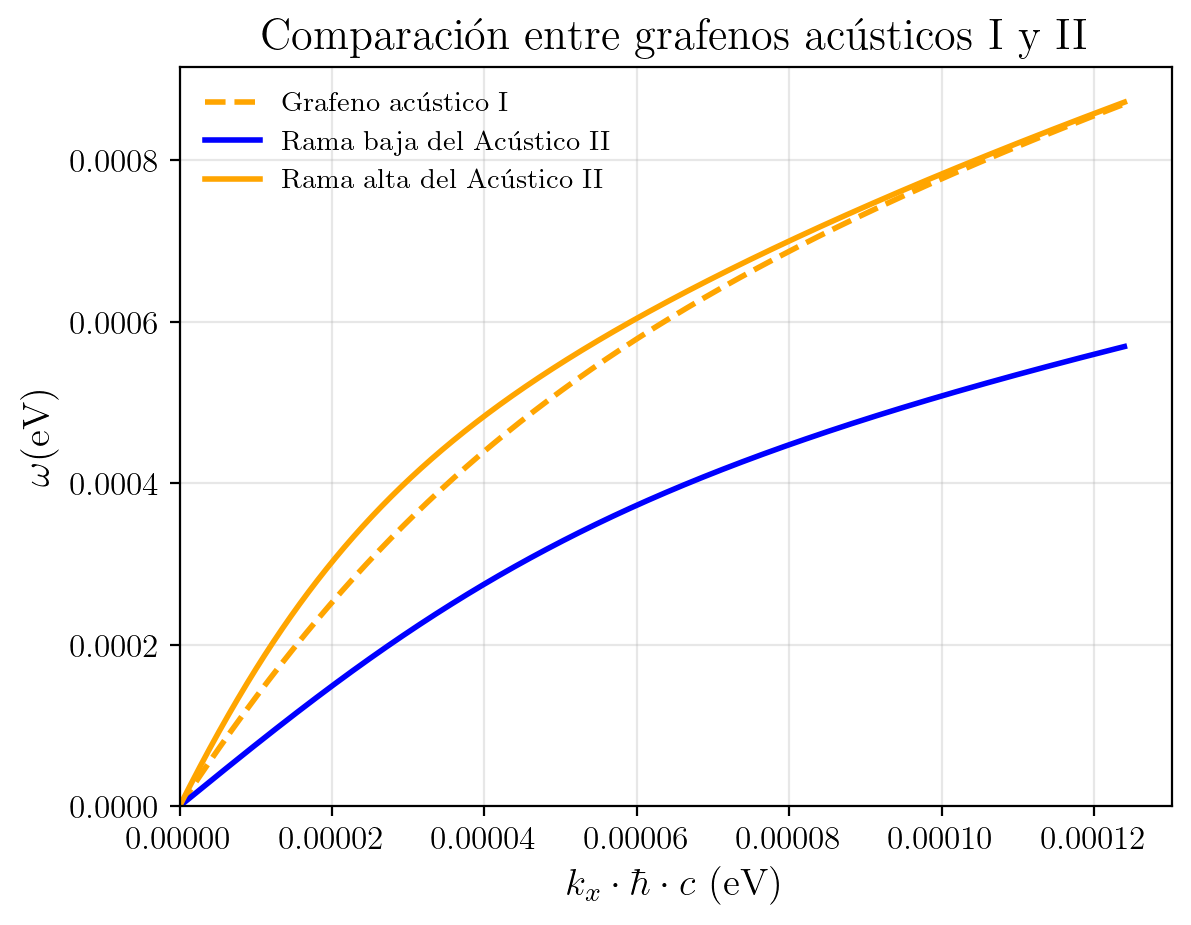

In [65]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})
# Epsilon
epsilon_1 = 1
epsilon_2 = 2
epsilon_3 = 5
# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Comparación entre grafenos acústicos I y II") #Título de la gráfica
x = np.linspace(0,factor_global,3000)
y_1 = np.sqrt((epsilon_2*x*w_D*np.sinh(x*d)/(1*np.sinh(x*d)+epsilon_2*np.cosh(x*d)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='Grafeno acústico I',color='orange',linestyle='--')

# Raíz interna
arg_raiz = (
    2  * x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2 * x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)     
ax.plot(x,omega1,label='Rama baja del Acústico II',color='blue')
ax.plot(x,omega2,label='Rama alta del Acústico II',color='orange')




# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

# Materiales polares

## 1. Polaritones fonónicos de volumen
Relación de dispersión $$w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 - \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$$ 
 $$w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 + \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$$
 
 Para los límites asíntoticos:
 
 ### 1. Cuando $kx \to 0$ 
 
 La ecuación es $$\varepsilon_\infty \frac{(wl^2 - w^2)}{(wt^2 - w^2)}\cdot w^2 = 0$$ cuya solución es $$w^2=0 \quad \text{y}\quad w^2=wl$$
 
 ### 2. Cuando $kx \to \infty$ hecho abajo
 
 

Vamos a representar tanto para el Si como para el Al

(0.0, 0.28689561477499187)

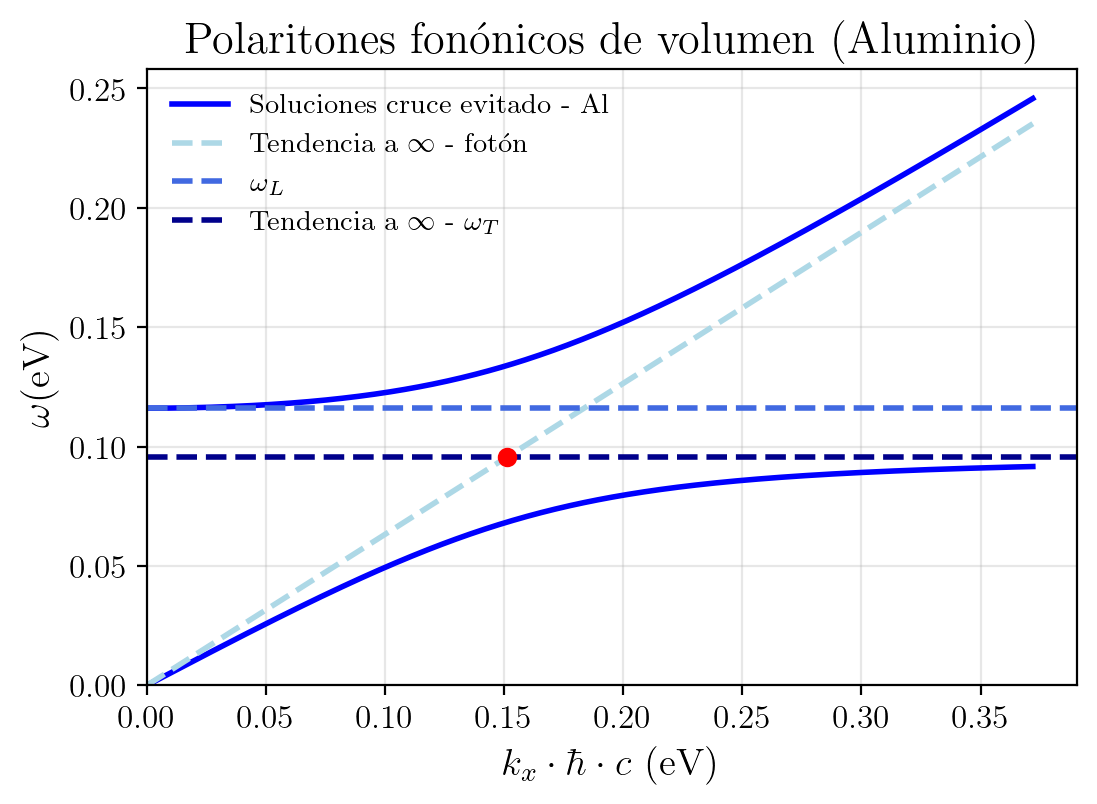

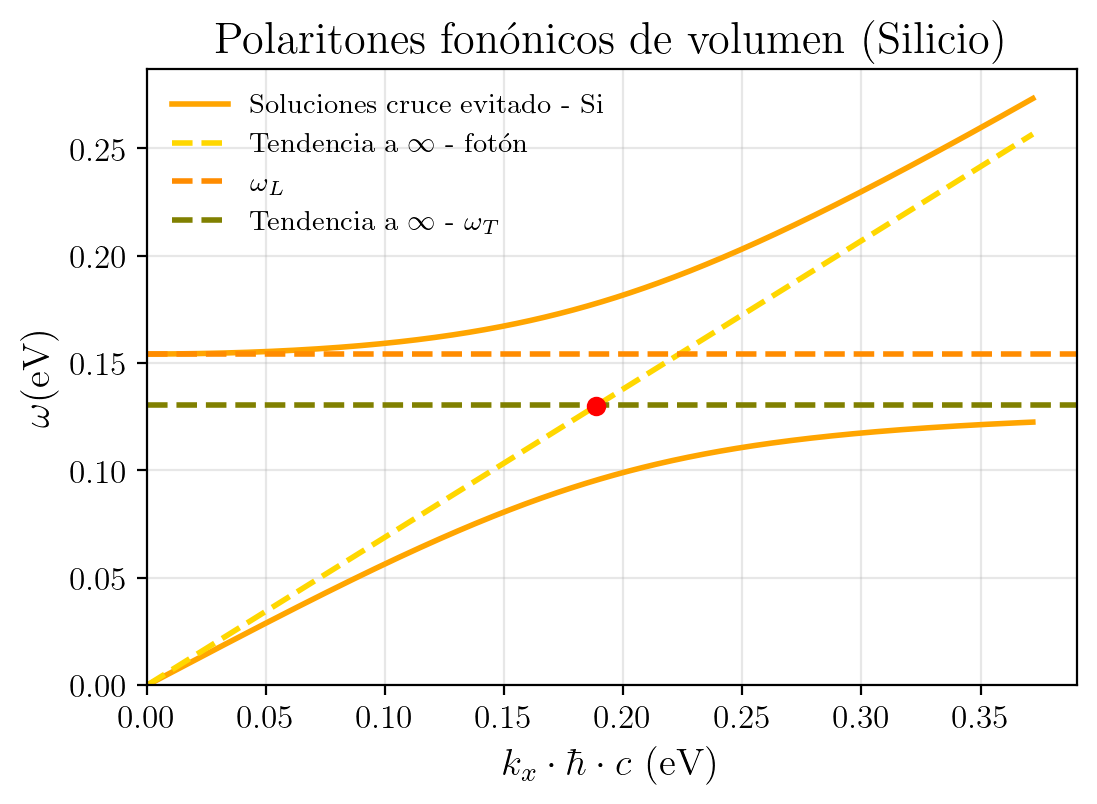

In [117]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen (Aluminio)") #Título de la gráfica
x = np.linspace(0,3000*factor_global,500)

y1al = np.sqrt((x**2+eps_inf_al*w_l0_al**2-np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y2al = np.sqrt((x**2+eps_inf_al*w_l0_al**2+np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))

fal = x/np.sqrt(eps_inf_al)
gal = w_t0_al
ax.plot(x,y1al,label='Soluciones cruce evitado - Al', color='blue')
ax.plot(x,y2al,color='blue')
ax.plot(x,fal,color='lightblue', linestyle ='--', label='Tendencia a $\infty$ - fotón')
plt.axhline(w_l0_al, color='royalblue', linestyle='--', linewidth=2, label='$\omega_L$')
plt.axhline(gal, color='darkblue', linestyle='--', linewidth=2, label='Tendencia a $\infty$ - $\omega_T$')

idx = np.argwhere(np.diff(np.sign(fal - gal))).flatten()
plt.plot(x[idx], fal[idx], 'ro')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)



# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen (Silicio)") #Título de la gráfica
x = np.linspace(0,3000*factor_global,500)

y1si = np.sqrt((x**2+eps_inf_si*w_l0_si**2-np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))
y2si = np.sqrt((x**2+eps_inf_si*w_l0_si**2+np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))

fsi = x/np.sqrt(eps_inf_si)
gsi = w_t0_si
ax.plot(x,y1si,label='Soluciones cruce evitado - Si', color='orange')
ax.plot(x,y2si,color='orange')
ax.plot(x,fsi,color='gold', linestyle ='--', label='Tendencia a $\infty$ - fotón')
plt.axhline(w_l0_si, color='darkorange', linestyle='--', linewidth=2, label='$\omega_L$')
plt.axhline(gsi, color='olive', linestyle='--', linewidth=2, label='Tendencia a $\infty$ - $\omega_T$')

idx = np.argwhere(np.diff(np.sign(fsi - gsi))).flatten()
plt.plot(x[idx], fsi[idx], 'ro')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)

Ahora vamos a mostrar la diferencia entre $w_+ - w_-$ para pder ver el mínimo y compararlo con el gap del cruce evitado. Para el valor del mínimo gap del cruce evitado es la intersección entre el valor dado por $w_t$ y la línea de fonones, que para este caso vendrá dada por la ecuación $\varepsilon_{\infty}w^2=c^2k_x^2 \longrightarrow k_{min}=\sqrt{\varepsilon_{\infty}}w_t/c$

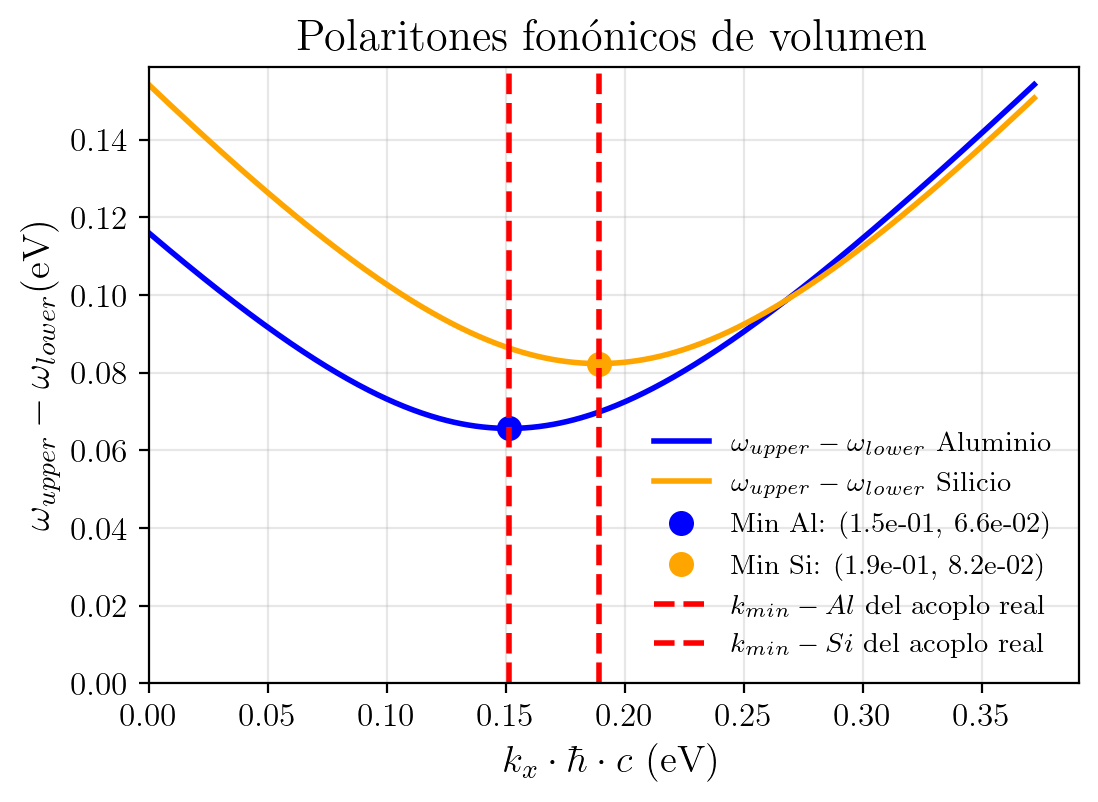

In [89]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen") #Título de la gráfica
x = np.linspace(0,3000*factor_global,500)

y1al = np.sqrt((x**2+eps_inf_al*w_l0_al**2-np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y2al = np.sqrt((x**2+eps_inf_al*w_l0_al**2+np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y1si = np.sqrt((x**2+eps_inf_si*w_l0_si**2-np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))
y2si = np.sqrt((x**2+eps_inf_si*w_l0_si**2+np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))


# Cálculo de las funciones finales
y_al = y2al - y1al
y_si = y2si - y1si

ax.plot(x,y_al,label=' $\omega_{upper}-\omega_{lower}$ Aluminio', color='blue')
ax.plot(x,y_si,label=' $\omega_{upper}-\omega_{lower}$ Silicio', color='orange')

# --- BÚSQUEDA DE MÍNIMOS ---
idx_min_al = np.argmin(y_al)
x_min_al = x[idx_min_al]
y_min_al = y_al[idx_min_al]

idx_min_si = np.argmin(y_si)
x_min_si = x[idx_min_si]
y_min_si = y_si[idx_min_si]
# Marcar los mínimos en la gráfica
ax.plot(x_min_al, y_min_al,'o', markersize=8, 
        label=f'Min Al: ({x_min_al:.1e}, {y_min_al:.1e})',color='blue')
ax.plot(x_min_si, y_min_si, 'o', markersize=8, 
        label=f'Min Si: ({x_min_si:.1e}, {y_min_si:.1e})',color='orange')
plt.axvline(np.sqrt(eps_inf_al)*w_t0_al, color='r', linestyle='--', linewidth=2, label='$k_{min}-Al$ del acoplo real')
plt.axvline(np.sqrt(eps_inf_si)*w_t0_si, color='r', linestyle='--', linewidth=2, label='$k_{min}-Si$ del acoplo real')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega_{upper}-\omega_{lower}$(eV)")
ax.legend(loc="lower right", frameon=False, fontsize='small' )


# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Fonones superficiales
Relación de dispersión

$$w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$
$$
w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$

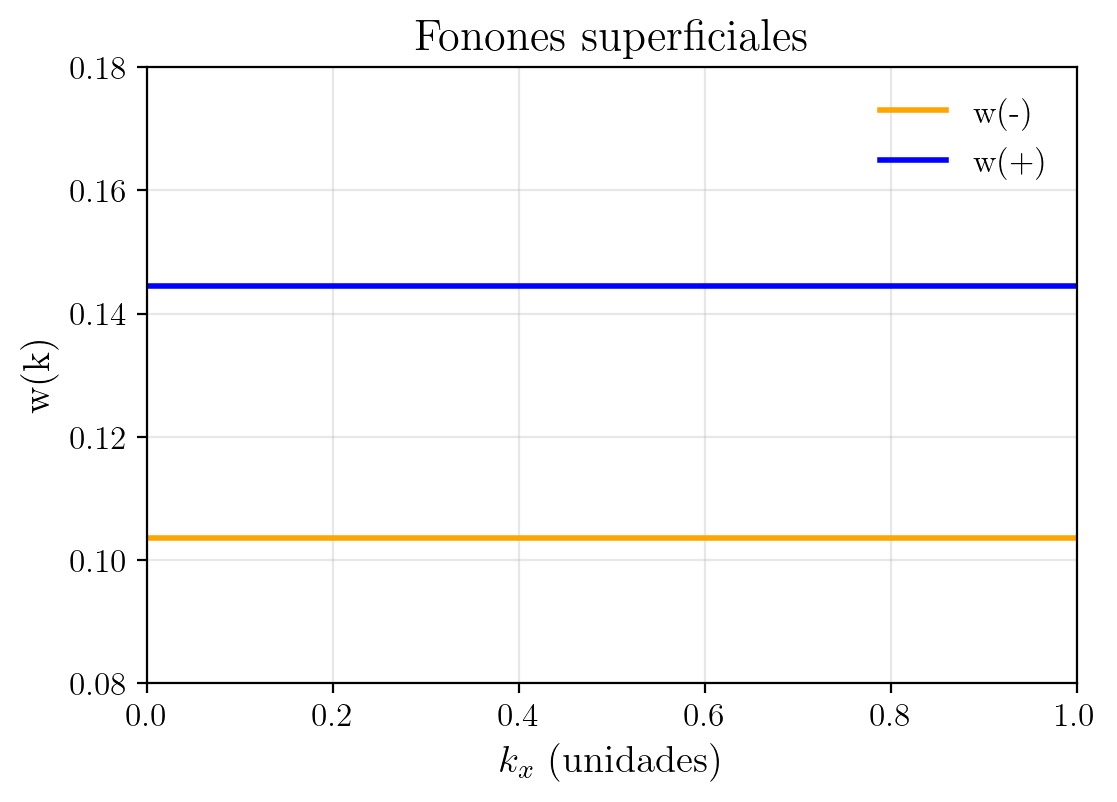

In [14]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Fonones superficiales") #Título de la gráfica
x = np.linspace(0,0.000000002,500)

y2 = np.sqrt(
    (
        eps_inf_si * (w_l0_si**2 + w_t0_al**2)
        + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
        + np.sqrt(
            -4 * (eps_inf_al + eps_inf_si)
            * (eps_inf_si * w_l0_si**2 * w_t0_al**2 + eps_inf_al * w_l0_al**2 * w_t0_si**2)
            + (
                eps_inf_si * (w_l0_si**2 + w_t0_al**2)
                + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
            )**2
        )
    )
    / (2 * (eps_inf_al + eps_inf_si))
)
y1 = np.sqrt(
    (
        eps_inf_si * (w_l0_si**2 + w_t0_al**2)
        + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
        - np.sqrt(
            -4 * (eps_inf_al + eps_inf_si)
            * (eps_inf_si * w_l0_si**2 * w_t0_al**2 + eps_inf_al * w_l0_al**2 * w_t0_si**2)
            + (
                eps_inf_si * (w_l0_si**2 + w_t0_al**2)
                + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
            )**2
        )
    )
    / (2 * (eps_inf_al + eps_inf_si))
)




plt.axhline(y1,color='orange', label='w(-)')
plt.axhline(y2,color='blue', label='w(+)')




# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="best", frameon=False)

# --- Límites y anotaciones ---
ax.set_ylim(0.08,0.18)

plt.show()


## 3. Lámina de material polar de espesor d
Relación de dispersión

$$w^2=\frac{\varepsilon_{\infty}w_l^2cosh(k_xh)+\varepsilon_1w_t^2senh(k_xh)}{\varepsilon_{\infty}cosh(k_xh)+\varepsilon_1senh(k_xh)}$$

Cuando d tiende a infinito vamos a tener que:

$$w^2=\frac{\varepsilon_{\infty}w_l^2+\varepsilon_1w_t^2}{\varepsilon_{\infty}+\varepsilon_1} \equiv \omega_{\infty_{1-2}}$$

Y si d tiende a 0 los Cosh son los que sobreviven ya que el Senh tiende a 0, luego

$$w^2=wl^2$$

In [91]:
#Definición de parámetro altura
h=5*1239.84193 #el 5 representa los nanometros

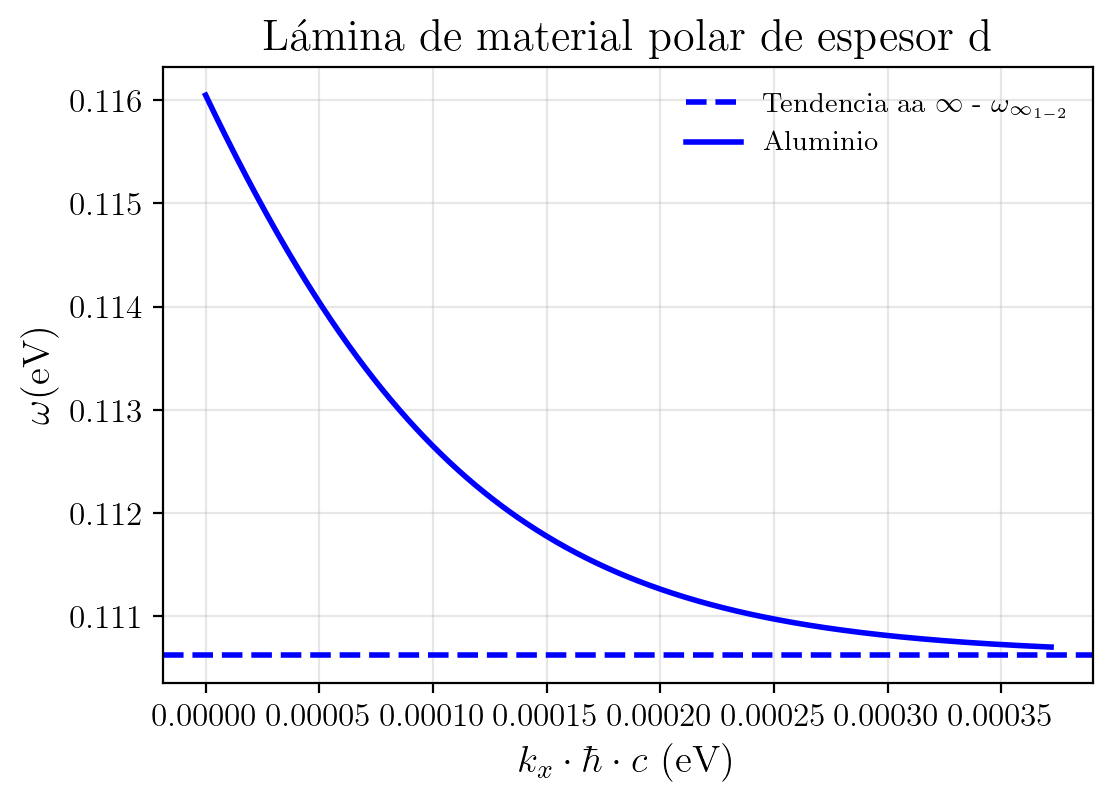

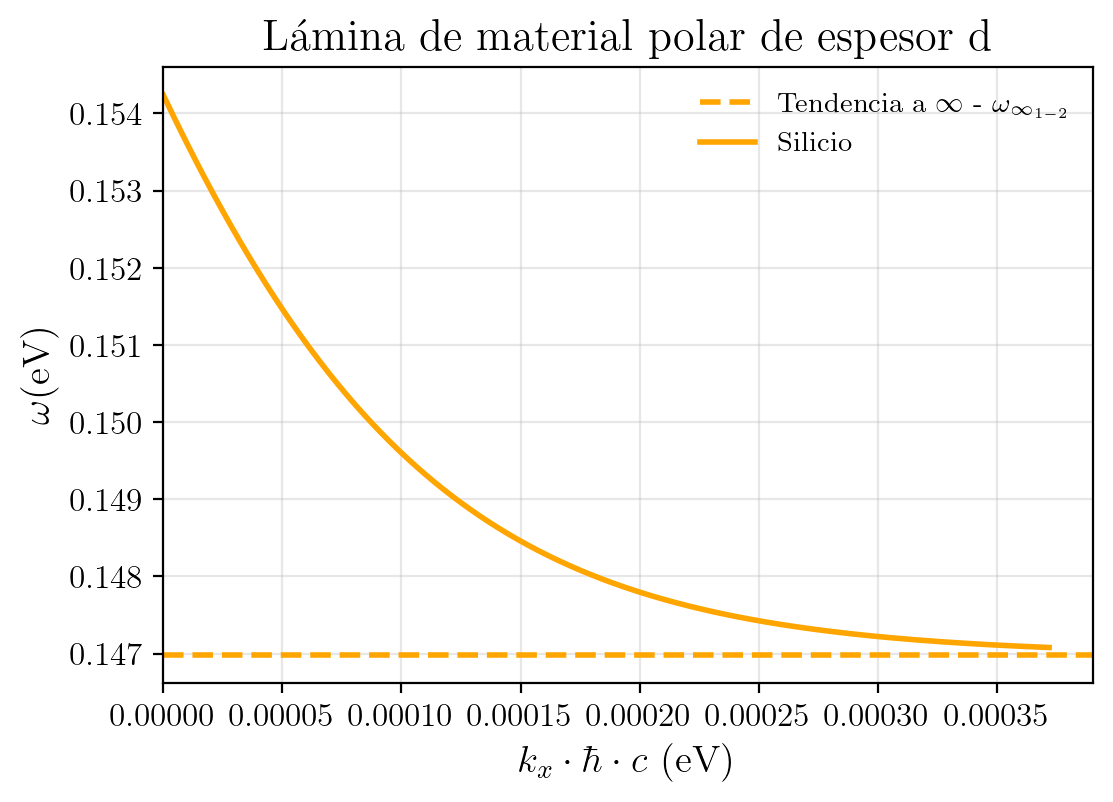

In [103]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Lámina de material polar de espesor d") #Título de la gráfica
x = np.linspace(0,3*factor_global,500)

yal= np.sqrt((eps_inf_al*w_l0_al**2*np.cosh(x*h)+1*w_t0_al**2*np.sinh(x*h))/(eps_inf_al*np.cosh(x*h)+1*np.sinh(x*h)))
infinitoal= np.sqrt((eps_inf_al*w_l0_al**2+1*w_t0_al**2)/(eps_inf_al+1))
plt.axhline(infinitoal,color='blue', linestyle ='--', label='Tendencia aa $\infty$ - $\omega_{\infty_{1-2}}$')

ax.plot(x,yal,label='Aluminio', color='blue')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper right", frameon=False, fontsize='small' )

plt.show()
# --- Límites y anotaciones ---
ax.set_xlim(0,)

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Lámina de material polar de espesor d") #Título de la gráfica
x = np.linspace(0,3*factor_global,500)


ysi= np.sqrt((eps_inf_si*w_l0_si**2*np.cosh(x*h)+1*w_t0_si**2*np.sinh(x*h))/(eps_inf_si*np.cosh(x*h)+1*np.sinh(x*h)))
infinitosi= np.sqrt((eps_inf_si*w_l0_si**2+1*w_t0_si**2)/(eps_inf_si+1))
plt.axhline(infinitosi,color='orange', linestyle ='--', label='Tendencia a $\infty$ - $\omega_{\infty_{1-2}}$')
ax.plot(x,ysi,label='Silicio', color='orange')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper right", frameon=False, fontsize='small' )


# --- Límites y anotaciones ---
ax.set_xlim(0,)

plt.show()

## 4. Hibridación de polaritones fonónicos superficiales I
**Lámina polar (2) de espesor \(d\) sobre sustrato polar (3), con $ \varepsilon_1$.**  
Definimos $u\equiv \omega^2$ (es bicúbica)

### Ecuación general en $u=\omega^2$
$$
\tanh(d\,k_x)\Big[
\varepsilon_{1}\varepsilon_{\infty 3}\,(\omega_{L3}^2-u)\,(\omega_{T2}^2-u)^2
+\varepsilon_{\infty 2}^{\,2}\,(\omega_{L2}^2-u)^2\,(\omega_{T3}^2-u)
\Big]
+\varepsilon_{\infty 2}\varepsilon_{\infty 3}\,(\omega_{L2}^2-u)\,(\omega_{L3}^2-u)\,(\omega_{T2}^2-u)
+\varepsilon_{1}\varepsilon_{\infty 2}\,(\omega_{L2}^2-u)\,(\omega_{T3}^2-u)\,(\omega_{T2}^2-u)=0.
$$

Para resolverlo debemos de hacer uso un método numérico, siendo las ecuaciones (si Al arriba o Al abajo):

$$
0.0000206569 Cosh[d kx] + u^3 (-7.75 Cosh[d kx] - 8.35 Sinh[d kx]) + 
  u (-0.0047448 Cosh[d kx] - 0.00508909 Sinh[d kx]) + 
  u^2 (0.342797 Cosh[d kx] + 0.363105 Sinh[d kx]) + 
  0.0000234777 Sinh[d kx] = 0
$$

$$0.0000364004 Cosh[d kx] + u^3 (-7.35 Cosh[d kx] - 6.91 Sinh[d kx]) + 
  u (-0.00664436 Cosh[d kx] - 0.00628702 Sinh[d kx]) + 
  u^2 (0.389832 Cosh[d kx] + 0.36895 Sinh[d kx]) + 
  0.0000326084 Sinh[d kx] == 0
  $$

Las soluciones las vamos a representar junto a sus límites asintóticos:

---

### 1) Límite $k_x\to 0$
Como $\tanh(d\,k_x)\to 0$, queda
$$
\varepsilon_{\infty 2}\,(\omega_{L2}^2-u)(\omega_{T2}^2-u)\,
\Big[\varepsilon_{\infty 3}(\omega_{L3}^2-u)+\varepsilon_{1}(\omega_{T3}^2-u)\Big]=0.
$$

De aquí:
$$
u_{10}=\omega_{L2}^2,\qquad
u_{20}=\omega_{T2}^2,
$$
y la raíz de interfaz $(3|1)$:
$$
\omega^2=\frac{\varepsilon_{\infty 3}\,\omega_{L3}^2+\varepsilon_{1}\,\omega_{T3}^2}
{\varepsilon_{\infty 3}+\varepsilon_{1}} \equiv \omega_{\infty_{1-3}}
$$

---

### 2) Límite asintótico $k_x\to\infty$
Como $\tanh(d\,k_x)\to 1$, resulta una cúbica en $u$. Una solución analítica toma la forma del modo superficial del medio 2 con el externo $\varepsilon_1$:
$$
u_{1inf}=\omega^2=\frac{\varepsilon_{\infty 2}\,\omega_{L2}^2+\varepsilon_{1}\,\omega_{T2}^2}
{\varepsilon_{\infty 2}+\varepsilon_{1}}  \equiv \omega_{\infty_{1-2}}
$$

Las otras dos raíces coinciden con las frecuencias de fonones superficiales de los medios polares semiinfinitos, cuya relación de dispersión es:
$$
u_{2inf} = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$
$$
u_{3inf} = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$


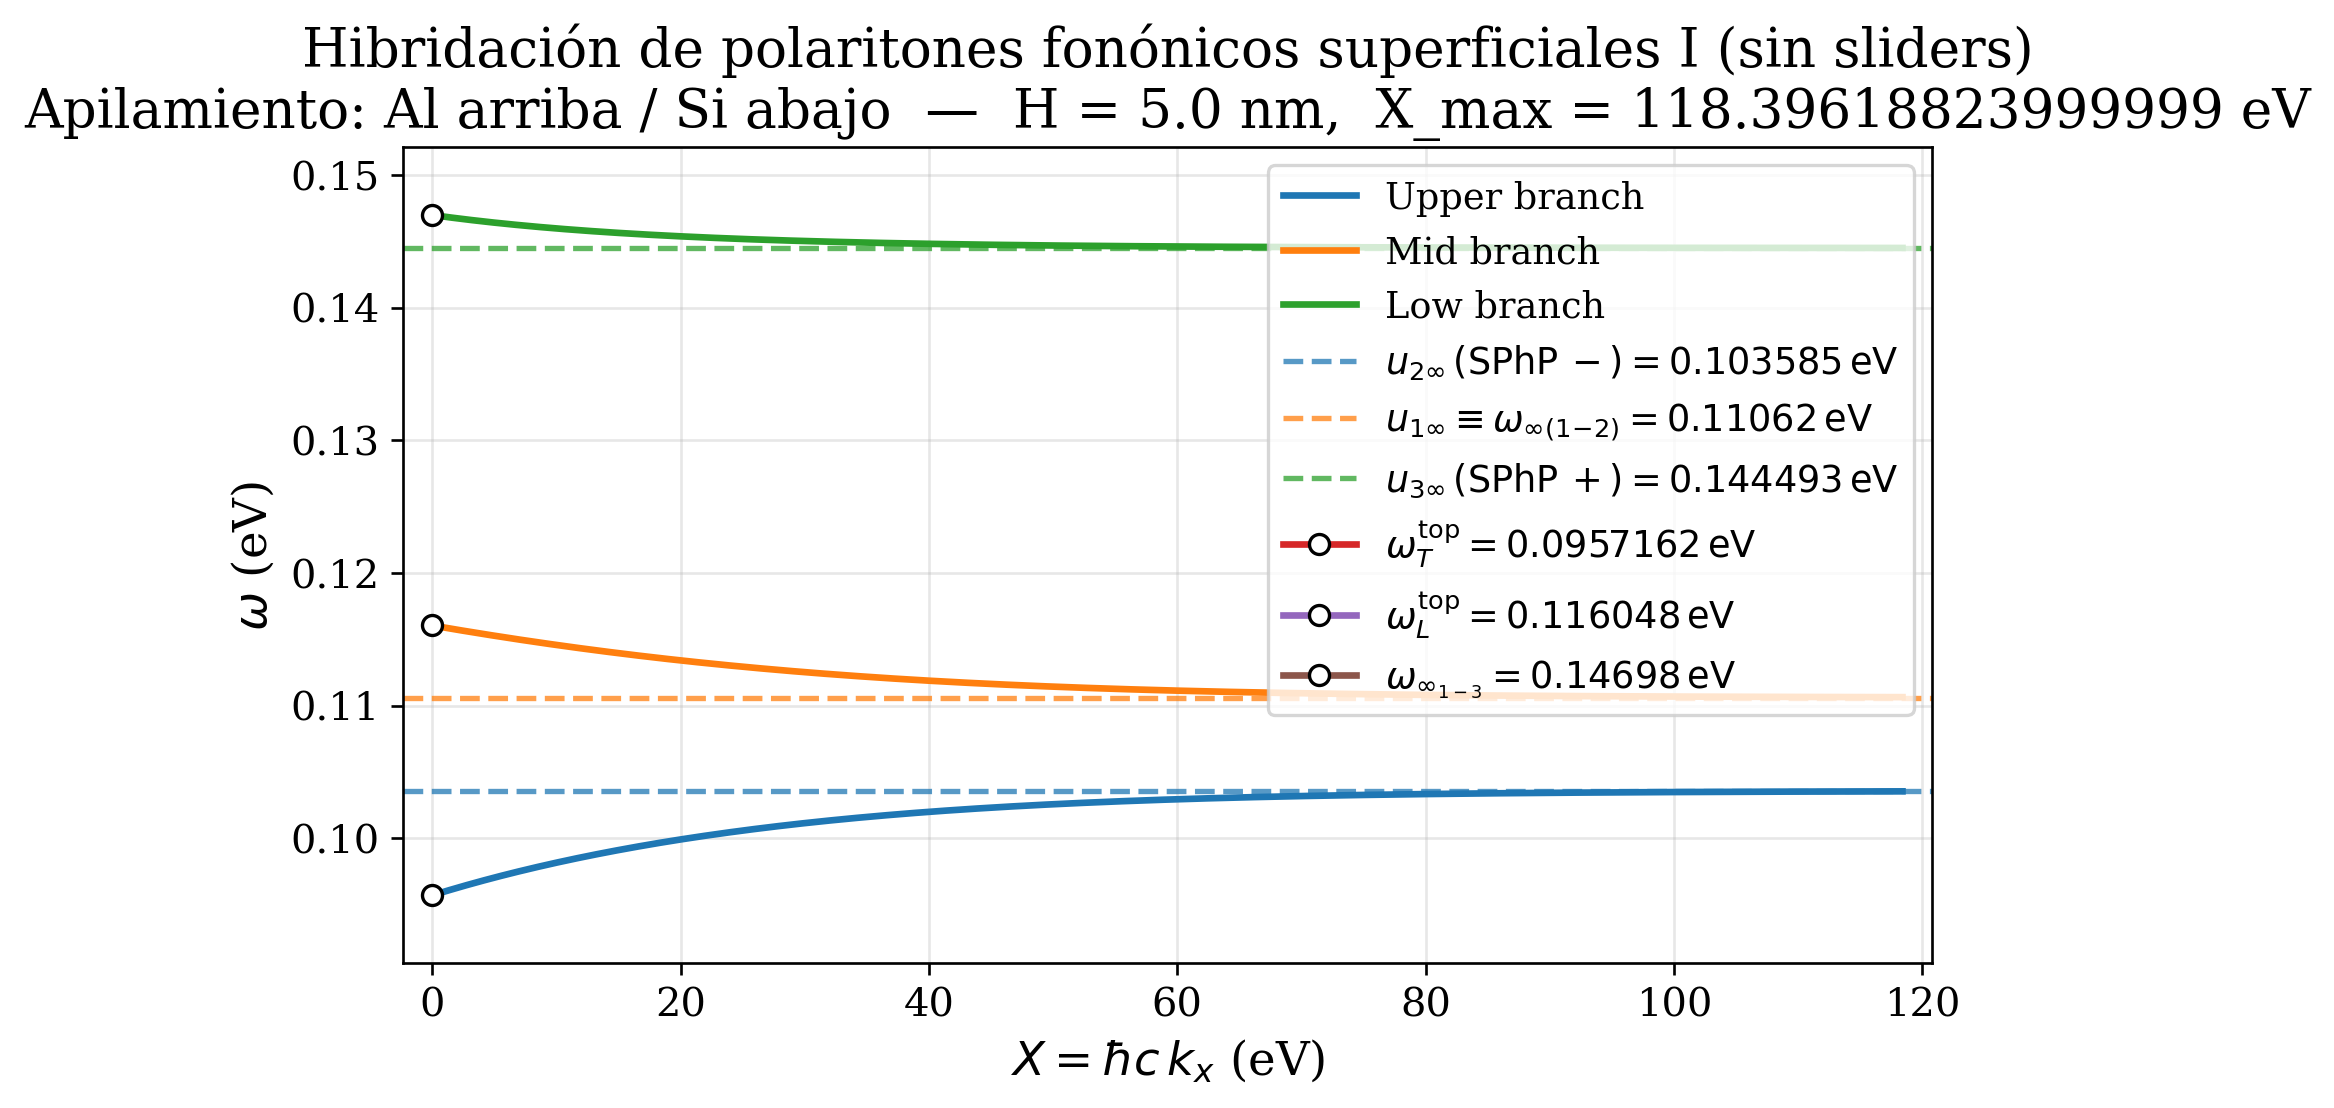

In [186]:
# -*- coding: utf-8 -*-
# Dispersión ω(kx) SIN sliders. Se fija H (nm) y X_max = (ħ c) kx (eV) al inicio.
# El eje X se representa como X = ħ c · kx (en eV), y la ecuación usa tanh(H·kx_phys) con kx_phys en nm^{-1}.

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from collections import OrderedDict

# =============================
# Parámetros de entrada (EDITA)
# =============================
H_NM = 5.0                # espesor H en nanómetros
NUM_PTS = 600             # densidad de muestreo del eje X

# --- Escala del eje X (elige UNA de las opciones) ---
# Opción 1 (recomendada): fija el valor máximo del argumento de tanh: t_max = H_nm * kx_phys_max.
# Con t_max ≣ 3 ya estás prácticamente en el régimen asintótico (tanh ≈ 0.995).
T_MAX = 3              # pon None para desactivar esta opción

# Opción 2: fija directamente X_max = (ħ c) kx_max en eV
KX_HBARC_MAX_EV = None    # si es None y T_MAX no lo es, se calculará a partir de T_MAX

# Opción 3 (legacy, para imitar tu código anterior que usaba d_eV = h * (hc)):
LEGACY_MATCH = False
LEGACY_KX_MAX_EVINV = 1e-3  # kx_max anterior (en eV^{-1}) si activas LEGACY_MATCH

# --- Resolución de X_max según la opción elegida ---
# HBARC_EV_NM definido arriba
REAL_TOL = 1e-8             # tolerancia parte imaginaria
_DEF_EPS = 1e-12

plt.rcParams.update({
    "text.usetex": False,     # mathtext interno
    "axes.unicode_minus": False,
})

# -------------------------------------------------------------------------------------
# Sistemas (apilamientos) y coeficientes de la cúbica: a3 u^3 + a2 u^2 + a1 u + a0 = 0
# con a_i(t) = a_i^C + a_i^S · tanh(t), t = H_nm · kx_phys (dimensionless)
# -------------------------------------------------------------------------------------
CONFIGS = {
    "Al|Si": {"a3_C": -7.75, "a3_S": -8.35, "a2_C": 0.342797, "a2_S": 0.363105,
               "a1_C": -0.0047448, "a1_S": -0.00508909, "a0_C": 2.06569e-05, "a0_S": 2.34777e-05},
    "Si|Al": {"a3_C": -7.35, "a3_S": -6.91,  "a2_C": 0.389832, "a2_S": 0.36895,
               "a1_C": -0.00664436, "a1_S": -0.00628702, "a0_C": 3.64004e-05, "a0_S": 3.26084e-05},
}
CONFIG_LABELS = {"Al|Si": "Al arriba / Si abajo", "Si|Al": "Si arriba / Al abajo"}

# -------------------------------------------------------------------------------------
# Helpers físicos para etiquetas de leyenda (usa variables globales si existen)
# Espera: e1, eps_inf_al/si, w_l0_al/si, w_t0_al/si
# -------------------------------------------------------------------------------------

def _materials_for_apilamiento(apilamiento: str):
    try:
        mats = {
            "Al": {"einf": float(eps_inf_al), "wL": float(w_l0_al), "wT": float(w_t0_al)},
            "Si": {"einf": float(eps_inf_si), "wL": float(w_l0_si), "wT": float(w_t0_si)},
        }
        e1_loc = float(e1)
        if apilamiento == "Al|Si":
            top, bottom = mats["Al"], mats["Si"]
        else:
            top, bottom = mats["Si"], mats["Al"]
        return {"top": top, "bottom": bottom, "e1": e1_loc}
    except Exception:
        return None

def _u1inf_w(mat, e1_val):
    u1 = (mat["einf"]*mat["wL"]**2 + e1_val*mat["wT"]**2) / (mat["einf"] + e1_val)
    return float(np.sqrt(max(u1, 0.0)))

def _u23inf_w_pair(top, bottom):
    a = bottom["einf"]*(bottom["wL"]**2 + top["wT"]**2) + top["einf"]*(top["wL"]**2 + bottom["wT"]**2)
    b = -4.0*(top["einf"] + bottom["einf"])*(bottom["einf"]*bottom["wL"]**2*top["wT"]**2 + top["einf"]*top["wL"]**2*bottom["wT"]**2)
    disc = max(a*a + b, 0.0)
    denom = 2.0*(top["einf"] + bottom["einf"])
    u2 = (a - np.sqrt(disc)) / denom
    u3 = (a + np.sqrt(disc)) / denom
    return float(np.sqrt(max(u2, 0.0))), float(np.sqrt(max(u3, 0.0)))

def _match_labels(values: np.ndarray, candidates: OrderedDict, rel_tol: float = 2e-2):
    out = []
    for v in values:
        if not np.isfinite(v):
            continue
        best_key, best_rel = None, float("inf")
        for name, cv in candidates.items():
            rel = abs(v - cv) / max(cv, 1e-12)
            if rel < best_rel:
                best_key, best_rel = name, rel
        approx = r"\sim " if best_rel > rel_tol else ""
        out.append((float(v), rf"${approx}{best_key} = {v:.6g}\,\mathrm{{eV}}$"))
    return out

def _legend_candidates_zero(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    cand = OrderedDict()
    cand[r"\omega_T^{\mathrm{top}}"]    = top["wT"]
    cand[r"\omega_L^{\mathrm{top}}"]    = top["wL"]
    cand[r"\omega_T^{\mathrm{bottom}}"] = bottom["wT"]
    # petición previa: etiquetar L del bottom como ω_{∞_{1-3}}
    cand[r"\omega_{\infty_{1-3}}"]       = _u1inf_w(bottom, e1_val)
    # y añadimos también ω_{∞(1-2)} por claridad
    cand[r"\omega_{\infty(1\!-\!2)}"]   = _u1inf_w(top, e1_val)
    return cand

def _legend_candidates_inf(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    w1 = _u1inf_w(top, e1_val)
    w2, w3 = _u23inf_w_pair(top, bottom)
    return OrderedDict([
        (r"u_{1\infty}\equiv \omega_{\infty(1\!-\!2)}", w1),
        (r"u_{2\infty}\, (\mathrm{SPhP}\,-)", w2),
        (r"u_{3\infty}\, (\mathrm{SPhP}\,+)", w3),
    ])

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]
    for j in range(1, num_pts):
        avail = list(y_sets[j])
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches

# -------------------------------------------------------------------------------------
# Núcleo de cálculo (versión en nm & nm^{-1})
# -------------------------------------------------------------------------------------

def _coeffs_from_t(t: np.ndarray | float, apilamiento: str):
    cfg = CONFIGS[apilamiento]
    a3 = cfg["a3_C"] + cfg["a3_S"] * t
    a2 = cfg["a2_C"] + cfg["a2_S"] * t
    a1 = cfg["a1_C"] + cfg["a1_S"] * t
    a0 = cfg["a0_C"] + cfg["a0_S"] * t
    return a3, a2, a1, a0


def _omega_sets_over_kx_nm(h_nm: float, kx_phys_nminv: np.ndarray, apilamiento: str):
    t = np.tanh(h_nm * kx_phys_nminv)
    a3, a2, a1, a0 = _coeffs_from_t(t, apilamiento)
    coeffs = np.vstack([a3, a2, a1, a0]).T
    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        ur = _real_nonneg_roots(np.roots(c))
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas_any(h_or_d: float, apilamiento: str):
    # límites t=0 y t=1 — independientes de unidades de kx/d (solo depende de t)
    a3, a2, a1, a0 = _coeffs_from_t(0.0, apilamiento)
    u0 = np.roots([a3, a2, a1, a0]); w0 = np.sqrt(np.clip(np.sort(_real_nonneg_roots(u0)), 0.0, None))
    a3i, a2i, a1i, a0i = _coeffs_from_t(1.0, apilamiento)
    ui = np.roots([a3i, a2i, a1i, a0i]); winf = np.sqrt(np.clip(np.sort(_real_nonneg_roots(ui)), 0.0, None))
    return w0, winf

# -------------------------------------------------------------------------------------
# Colores para asintóticas (match por valor de cola de cada rama)
# -------------------------------------------------------------------------------------

def _asymptote_color_map(winf: np.ndarray, branches: List[np.ndarray], lines: list) -> list:
    colors = [None] * len(winf)
    if len(winf) == 0:
        return colors
    tails, cols = [], []
    for br, ln in zip(branches, lines):
        if ln is None or br is None:
            continue
        idxs = np.where(np.isfinite(br))[0]
        if idxs.size == 0:
            continue
        tails.append(float(br[idxs[-1]]))
        cols.append(ln.get_color())
    assigned = set()
    for tail, col in zip(tails, cols):
        if not np.isfinite(tail):
            continue
        dists = [abs(float(w) - tail) for w in winf]
        for idx in np.argsort(dists):
            if idx not in assigned:
                colors[idx] = col
                assigned.add(idx)
                break
    return colors

# -------------------------------------------------------------------------------------
# Plot principal (sin sliders): X = ħc·kx (eV)
# -------------------------------------------------------------------------------------

def plot_dispersion_no_widgets(H_nm=H_NM, Xmax_eV=KX_HBARC_MAX_EV, apilamiento="Al|Si", asintoticas=True):
    # Construye eje X en eV y kx físico en nm^{-1}
    # Soporta Xmax_eV=None (se resuelve con T_MAX o fallback)
    if Xmax_eV is None:
        try:
            if 'T_MAX' in globals() and T_MAX is not None:
                Xmax_eV = float(T_MAX) * HBARC_EV_NM / float(H_nm)
            elif 'KX_HBARC_MAX_EV' in globals() and KX_HBARC_MAX_EV is not None:
                Xmax_eV = float(KX_HBARC_MAX_EV)
            else:
                Xmax_eV = 50.0
        except Exception:
            Xmax_eV = 50.0
    kx_max_nminv = float(Xmax_eV) / HBARC_EV_NM
    kx_phys = np.linspace(0.0, kx_max_nminv, int(NUM_PTS))
    X_eV = HBARC_EV_NM * kx_phys

    # Soluciones ω(kx_phys)
    omega_sets = _omega_sets_over_kx_nm(float(H_nm), kx_phys, apilamiento)
    branches = _track_branches(omega_sets, max_branches=3)

    # ---- Trazado ----
    plt.figure(figsize=(7.6, 4.8), dpi=120)
    labels = ["Upper branch", "Mid branch", "Low branch"]
    any_data = False
    line_objs = []
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            ln, = plt.plot(X_eV, br, lw=2, label=labels[i])
            line_objs.append(ln)
        else:
            line_objs.append(None)

    if asintoticas:
        w0, winf = _limit_omegas_any(H_nm, apilamiento)
        # Colores de asintóticas según rama
        asym_colors = _asymptote_color_map(winf, branches, line_objs)
        cand_inf = _legend_candidates_inf(apilamiento)
        if cand_inf is not None and winf.size:
            pairs_inf = _match_labels(winf, cand_inf, rel_tol=2e-2)
            for idx, (y, lbl) in enumerate(pairs_inf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=lbl)
        else:
            for idx, y in enumerate(winf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=rf"$\\omega_{{\\infty,{idx+1}}}={float(y):.6g}\\,\\mathrm{{eV}}$")

        # marcadores en X=0 (kx=0)
        cand_zero = _legend_candidates_zero(apilamiento)
        x0 = X_eV[0]
        if cand_zero is not None and w0.size:
            pairs_zero = _match_labels(w0, cand_zero, rel_tol=2e-2)
            for y, lbl in pairs_zero:
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k', label=lbl)
        else:
            for idx, y in enumerate(w0):
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k',
                         label=rf"$\\omega_{{0,{idx+1}}}={float(y):.6g}\\,\\mathrm{{eV}}$")

    titulo = (
        "Hibridación de polaritones fonónicos superficiales I (sin sliders)" + "\n" +
        f"Apilamiento: {CONFIG_LABELS[apilamiento]}  —  H = {H_nm} nm,  X_max = {Xmax_eV} eV"
    )
    plt.title(titulo)
    plt.xlabel(r"$X = \hbar c\, k_x$ (eV)")
    plt.ylabel(r"$\omega$ (eV)")
    plt.grid(True, alpha=0.3)

    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        y0, yi = _limit_omegas_any(H_nm, apilamiento)
        yextra = np.hstack([y0, yi]) if (y0.size + yi.size) else np.array([])
        if yextra.size:
            ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (X_eV[-1] - X_eV[0])
        plt.xlim(X_eV[0] - xpad, X_eV[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1)
    plt.tight_layout()
    plt.show()

# Llamada directa para generar la figura con los parámetros actuales
plot_dispersion_no_widgets(H_nm=H_NM, Xmax_eV=KX_HBARC_MAX_EV, apilamiento="Al|Si", asintoticas=True)


In [132]:
H_nm = 12

## 4. Hibridación de polaritones fonónicos superficiales II
### Ecuación general (sin simplificar)

$$
-\mathrm{e}^{2(d+h)k_x}\big(\mathrm{einf2}\,(u-\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)\\
\qquad+\;\mathrm{e}^{2 d k_x}\big(\mathrm{einf2}\,(-u+\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)\\
\qquad+\;\mathrm{e}^{4 d k_x}\big(\mathrm{einf2}\,(u-\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)\\
\qquad-\;\mathrm{e}^{2 h k_x}\big(\mathrm{einf2}\,(-u+\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)
\;=\;0.
$$

---

## Límite $k_x\to 0$

Como $\mathrm{e}^{0}=1$, la ecuación una vez la simplificamos queda (sacado de Mathematica directo):

$$
\mathrm{einf2}\,\mathrm{einf3}\,(u-\mathrm{wl2}^2)(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)=0.
$$

Soluciones:

$$
\{\,u=\mathrm{wl2}^2,\; u=\mathrm{wl3}^2,\; u=\mathrm{wt2}^2\,\}.
$$

---

## Límite $k_x\to\infty$

### Caso $ d > h$, luego $4 d > 2 d, 2 h$ y $4 d > 2 d + 2 h$ luego domina el término de $4 d $

Domina el término con $\mathrm{e}^{4 d k_x}$. Queda:

$$
\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big)=0.
$$

Así, las asíntotas (en $u$) son:

$$
\boxed{\;u=\dfrac{\mathrm{einf2}\,\mathrm{wl2}^2+e1\,\mathrm{wt2}^2}{e1+\mathrm{einf2}}\;}
$$

y las dos raíces de la cuadrática:

$$
\boxed{\;u=\frac{\mathrm{einf2}\,\mathrm{wl2}^2-\mathrm{einf3}\,\mathrm{wl3}^2-\mathrm{einf3}\,\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wt3}^2\;\pm\;\sqrt{\big(-\mathrm{einf2}\,\mathrm{wl2}^2+\mathrm{einf3}\,\mathrm{wl3}^2+\mathrm{einf3}\,\mathrm{wt2}^2-\mathrm{einf2}\,\mathrm{wt3}^2\big)^2-4(\mathrm{einf2}-\mathrm{einf3})\big(-\mathrm{einf3}\,\mathrm{wl3}^2\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wl2}^2\mathrm{wt3}^2\big)}}{2(\mathrm{einf2}-\mathrm{einf3})}\;}
$$

(para $\mathrm{einf2}\neq\mathrm{einf3}$).

---

### Caso $h>d$ luego $2 h > 2 d$ y $2 h + 2 d > 4 d$, luego domina el de $2 (d + h)$

Domina el término con $\mathrm{e}^{2(d+h)k_x}$. Queda:

$$
\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big)=0.
$$

Así, las asíntotas (en $u$) son:

$$
\boxed{\;u=\dfrac{\mathrm{einf2}\,\mathrm{wl2}^2+e1\,\mathrm{wt2}^2}{e1+\mathrm{einf2}}\;}
$$

y las dos raíces de la cuadrática:

$$
\boxed{\;u=\frac{\mathrm{einf2}\,\mathrm{wl2}^2+\mathrm{einf3}\,\mathrm{wl3}^2+\mathrm{einf3}\,\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wt3}^2\;\pm\;\sqrt{\big(-\mathrm{einf2}\,\mathrm{wl2}^2-\mathrm{einf3}\,\mathrm{wl3}^2-\mathrm{einf3}\,\mathrm{wt2}^2-\mathrm{einf2}\,\mathrm{wt3}^2\big)^2-4(\mathrm{einf2}+\mathrm{einf3})\big(\mathrm{einf3}\,\mathrm{wl3}^2\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wl2}^2\mathrm{wt3}^2\big)}}{2(\mathrm{einf2}+\mathrm{einf3})}\;}
$$

(para $\mathrm{einf2}+\mathrm{einf3}\neq0$).

---

### Caso $d=h$, luego el término de $4 d$ y $2 (d + h)$ son de mayor orden que los otros 2, dominan ellos

Los dos términos líderes ($\mathrm{e}^{4dk_x}$ y $\mathrm{e}^{2(d+h)k_x}$) son del mismo orden y se cancelan entre sí dejando:

$$
\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big)\\
=\;\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big).
$$

De donde se obtienen las asíntotas:

$$
\{\,u=\mathrm{wl3}^2,\; u=\mathrm{wt2}^2,\; u=\dfrac{\mathrm{einf2}\,\mathrm{wl2}^2+e1\,\mathrm{wt2}^2}{e1+\mathrm{einf2}}\,\}.
$$


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from ipywidgets import interact, FloatSlider, Checkbox, Dropdown

# === Preferencias de render: evitar errores con LaTeX externo/Unicode ===
# Usamos Unicode (ω, √, ∞, super/subíndices) para evitar errores del parser mathtext.
plt.rcParams.update({
    "text.usetex": False,           # usar motor interno, no LaTeX externo
    "axes.unicode_minus": False,    # guiones seguros
})

# === Constantes y tolerancias ===
HC_EV_NM = 1239.84193  # (hc) en eV·nm — convierte longitudes [nm] -> [eV]
REAL_TOL = 1e-8        # tolerancia para parte imaginaria ~ 0
_DEF_EPS = 1e-12       # tolerancia para comparar con 0 (clip numérico)
NUM_PTS = 600          # puntos fijos en la malla kx

# -------------------------------------------------------------------------------------
# Sistema II: lámina d sobre lámina h (ambas polares) sobre sustrato conductor perfecto
#   Polinomio: a0 + a1 u + a2 u^2 + a3 u^3 = 0, con a_i = Σ C_i(exp(γ_i kx))
#   Exponentes usados: γ ∈ {2d, 4d, 2h, 2(d+h)}
# -------------------------------------------------------------------------------------

# Coeficientes para "Al arriba / Si abajo" (Al en d, Si en h) — proporcionados por el usuario
COEFFS_ALu_SIl = {
    '2d'    : [ 2.52535e-05, -5.10889e-03,  3.30825e-01, -6.9    ],
    '4d'    : [-4.92987e-06,  7.02827e-04, -4.16448e-02,  1.4    ],
    '2h'    : [-2.82083e-06,  3.44293e-04, -2.03083e-02,  0.6    ],
    '2(d+h)': [ 4.41346e-05, -9.83389e-03,  7.05901e-01, -16.1   ],
}

# Coeficientes para "Si arriba / Al abajo" (Si en d, Al en h) — proporcionados por el usuario
COEFFS_SIu_ALl = {
    '2d'    : [ 3.39477e-05, -5.92344e-03,  3.11478e-01, -5.06   ],
    '4d'    : [ 7.70832e-06, -8.25846e-04,  4.84989e-02, -1.24   ],
    '2h'    : [ 3.79198e-06, -3.57343e-04,  2.08817e-02, -0.44   ],
    '2(d+h)': [ 6.90087e-05, -1.29314e-02,  7.58782e-01, -14.26  ],
}

LABELS = {
    'Al|Si': 'Al ↑ / Si ↓',
    'Si|Al': 'Si ↑ / Al ↓',
}

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    """Filtra raíces con |Im|<tol y parte real >= -_DEF_EPS."""
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    """Asigna hasta 'max_branches' curvas por continuidad (greedy) a lo largo de kx.
    y_sets[j] contiene las ω reales (ordenadas) en el j‑ésimo kx.
    Devuelve listas de longitud num_pts con NaNs donde falta rama.
    """
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]

    # Inicializa con las raíces del primer punto (j=0)
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]

    # Recorre kx y enlaza por cercanía al valor previo
    for j in range(1, num_pts):
        avail = list(y_sets[j])  # raíces disponibles en este kx
        # 1) continúa ramas existentes eligiendo la raíz más cercana al valor previo
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        # 2) abre nuevas ramas si sobran raíces sin asignar
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches


# -------------------------------------------------------------------------------------
# Cálculo de coeficientes dependientes de (kx, d, h) y asintóticos
# -------------------------------------------------------------------------------------

def _select_coeff_table(apilamiento: str):
    if apilamiento == 'Al|Si':
        return COEFFS_ALu_SIl
    elif apilamiento == 'Si|Al':
        return COEFFS_SIu_ALl
    else:
        raise ValueError(f"Apilamiento desconocido: {apilamiento}")


def _coeffs_expon_over_kx(kx: np.ndarray, d_eV: float, h_eV: float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Devuelve (a3, a2, a1, a0) evaluados para cada kx según la tabla de coeficientes.
    **Con estabilización numérica**: se factoriza la exponencial dominante e^{-γ_max kx}
    común a (a0,a1,a2,a3), que no altera las raíces del cúbico en u.
    """
    tbl = _select_coeff_table(apilamiento)
    # Exponentes
    e2d  = np.exp(2.0 * d_eV * kx)
    e4d  = np.exp(4.0 * d_eV * kx)
    e2h  = np.exp(2.0 * h_eV * kx)
    e2dh = np.exp(2.0 * (d_eV + h_eV) * kx)

    # Estabilización: divide todos por la exponencial máxima en cada kx
    emax = np.maximum.reduce([e2d, e4d, e2h, e2dh])
    r2d, r4d, r2h, r2dh = e2d/emax, e4d/emax, e2h/emax, e2dh/emax  # ≤ 1

    # a0 + a1 u + a2 u^2 + a3 u^3 (todos escalados por 1/emax)
    c2d, c4d, c2h, c2dh = tbl['2d'], tbl['4d'], tbl['2h'], tbl['2(d+h)']
    a0 = c2d[0]*r2d + c4d[0]*r4d + c2h[0]*r2h + c2dh[0]*r2dh
    a1 = c2d[1]*r2d + c4d[1]*r4d + c2h[1]*r2h + c2dh[1]*r2dh
    a2 = c2d[2]*r2d + c4d[2]*r4d + c2h[2]*r2h + c2dh[2]*r2dh
    a3 = c2d[3]*r2d + c4d[3]*r4d + c2h[3]*r2h + c2dh[3]*r2dh
    return a3, a2, a1, a0  # orden para np.roots


def _omega_sets_over_kx(d_eV: float, h_eV: float, kx: np.ndarray, apilamiento: str) -> List[np.ndarray]:
    """Resuelve el cúbico en u para cada kx, filtra u≥0 reales y devuelve ω ordenadas."""
    a3, a2, a1, a0 = _coeffs_expon_over_kx(kx, d_eV, h_eV, apilamiento)
    coeffs = np.vstack([a3, a2, a1, a0]).T  # (num_pts, 4)

    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        u_roots = np.roots(c)
        ur = _real_nonneg_roots(u_roots)
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas(d_eV: float, h_eV: float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray]:
    """Calcula ω(kx→0) y ω(kx→∞) usando límites analíticos de las exponenciales."""
    # kx -> 0: todas las exponenciales → 1 ⇒ evalúa a_i con e^0=1
    a3_0, a2_0, a1_0, a0_0 = _coeffs_expon_over_kx(np.array([0.0]), d_eV, h_eV, apilamiento)
    u0 = np.roots([a3_0[0], a2_0[0], a1_0[0], a0_0[0]])
    u0r = _real_nonneg_roots(u0)
    w0 = np.sqrt(np.clip(np.sort(u0r), 0.0, None))

    # kx -> ∞: domina el término con γ máximo (si hay empate, se suman contribuciones)
    tbl = _select_coeff_table(apilamiento)
    g2d, g4d, g2h, g2dh = 2.0*d_eV, 4.0*d_eV, 2.0*h_eV, 2.0*(d_eV + h_eV)
    gmax = max(g2d, g4d, g2h, g2dh)
    a0_inf = (tbl['2d'][0]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][0]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][0]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][0]if np.isclose(g2dh, gmax) else 0.0)
    a1_inf = (tbl['2d'][1]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][1]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][1]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][1]if np.isclose(g2dh, gmax) else 0.0)
    a2_inf = (tbl['2d'][2]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][2]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][2]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][2]if np.isclose(g2dh, gmax) else 0.0)
    a3_inf = (tbl['2d'][3]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][3]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][3]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][3]if np.isclose(g2dh, gmax) else 0.0)

    u_inf = np.roots([a3_inf, a2_inf, a1_inf, a0_inf])
    uinfr = _real_nonneg_roots(u_inf)
    winf = np.sqrt(np.clip(np.sort(uinfr), 0.0, None))
    return w0, winf


# -------------------------------------------------------------------------------------
# Trazado (sin mathtext en ejes/leyendas)
# -------------------------------------------------------------------------------------

def _plot(kx: np.ndarray, d_eV: float, h_eV: float, branches: List[np.ndarray], apilamiento: str, show_asymptotes: bool = True):
    """Dibuja ramas ω(kx). Si show_asintototes=True, añade líneas horizontales ω∞ y marcadores ω0."""
    plt.figure(figsize=(7.6, 4.8), dpi=120)

    # 1) Ramas numéricas
    labels = ["Rama 1 (ω>0)", "Rama 2 (ω>0)", "Rama 3 (ω>0)"]
    any_data = False
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            plt.plot(kx, br, lw=2, label=labels[i])

    # 2) Asintóticas y cortes en kx=0
    if show_asymptotes:
        w0, winf = _limit_omegas(d_eV, h_eV, apilamiento)
        x0 = kx[0]
        for idx, w in enumerate(winf):
            y = float(w)
            plt.axhline(y=y, ls='--', lw=1.6, alpha=0.65, label=f"ω∞,{idx+1}={y:.6g}")
        for idx, w in enumerate(w0):
            y = float(w)
            plt.plot([x0], [y], marker='o', ms=6, mfc='white', mec='k', label=f"ω0,{idx+1}={y:.6g}")

    # 3) Decoración
    titulo = (
        "Hibridación de polaritones fonónicos superficiales II" + "\n" +
        f"Apilamiento: {LABELS[apilamiento]}"
    )
    
  
    
    plt.title(titulo)
    plt.xlabel("kₓ  [eV⁻¹]")
    plt.ylabel("ω = √u  [unid. de √u]")
    plt.grid(True, alpha=0.3)

    # Ajuste de límites con margen
    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        if show_asymptotes:
            w0, winf = _limit_omegas(d_eV, h_eV, apilamiento)
            yextra = np.hstack([w0, winf]) if (w0.size + winf.size) else np.array([])
            if yextra.size:
                ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (kx[-1] - kx[0])
        plt.xlim(kx[0] - xpad, kx[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# Interfaz
# -------------------------------------------------------------------------------------

def _solve_omega_vs_kx(d_nm: float, h_nm: float, kx_max: float, apilamiento: str) -> Tuple[np.ndarray, float, float, List[np.ndarray]]:
    """Resuelve la cúbica en todo el dominio kx y devuelve (kx, d_eV, h_eV, ramas ω)."""
    d_eV = d_nm * HC_EV_NM
    h_eV = h_nm * HC_EV_NM
    kx = np.linspace(0.0, kx_max, int(NUM_PTS))
    omega_sets = _omega_sets_over_kx(d_eV, h_eV, kx, apilamiento)
    branches = _track_branches(omega_sets, max_branches=3)
    return kx, d_eV, h_eV, branches


def plot_dispersion(d_nm=5.0, h_nm=5.0, kx_max=1e-3, apilamiento='Al|Si', asintoticas=True):
    """Función invocada por los sliders.
    d_nm, h_nm: espesores en nanómetros (se convierten a eV multiplicando por 1239.84193)
    kx_max    : límite superior del eje X en eV^{-1}
    apilamiento: 'Al|Si' (Al en d, Si en h) o 'Si|Al' (Si en d, Al en h)
    asintoticas: si True, dibuja ω∞ (kx→∞) y ω0 (kx=0)
    """
    kx, d_eV, h_eV, branches = _solve_omega_vs_kx(float(d_nm), float(h_nm), float(kx_max), apilamiento)
    _plot(kx, d_eV, h_eV, branches, apilamiento, show_asymptotes=bool(asintoticas))

# -------------------------------------------------------------------------------------
# Tests "smoke" mínimos
# -------------------------------------------------------------------------------------

def _self_tests():
    print("[self-test] Sistema II: comprobaciones básicas…")
    # Regímenes diferentes (gmax=4d vs gmax=2(d+h)) y ambos apilamientos
    for ap in ['Al|Si', 'Si|Al']:
        for d_nm, h_nm in [(30.0, 10.0), (10.0, 30.0)]:
            kx, d_eV, h_eV, _ = _solve_omega_vs_kx(d_nm, h_nm, 1e-4, ap)
            w0, winf = _limit_omegas(d_eV, h_eV, ap)
            assert np.all(np.isfinite(w0)) and np.all(w0 >= -1e-12), (ap, d_nm, h_nm, w0)
            assert np.all(np.isfinite(winf)) and np.all(winf >= -1e-12), (ap, d_nm, h_nm, winf)
    # tamaño de malla fijo
    kx2, *_ = _solve_omega_vs_kx(5.0, 5.0, 1e-3, 'Al|Si')
    assert len(kx2) == NUM_PTS
    print("[self-test] OK")

try:
    _self_tests()
except Exception as _e:
    print("[self-test] FALLO:", _e)

# -------------------------------------------------------------------------------------
# Controles interactivos: sliders para d y h (nm), kx_max y selector de apilamiento
# -------------------------------------------------------------------------------------
_inter = interact(
    plot_dispersion,
    d_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='d [nm]'),
    h_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='h [nm]'),
    kx_max=FloatSlider(value=1e-3, min=1e-7, max=1e-3, step=1e-7, readout_format='.1e', description='kx_max [eV^{-1}]'),
    apilamiento=Dropdown(options=[(LABELS['Al|Si'], 'Al|Si'), (LABELS['Si|Al'], 'Si|Al')], value='Al|Si', description='apilamiento'),
    asintoticas=Checkbox(value=True, description='asintóticas y cortes')
)



[self-test] Sistema II: comprobaciones básicas…
[self-test] OK


interactive(children=(FloatSlider(value=5.0, description='d [nm]', max=50.0, min=0.1), FloatSlider(value=5.0, …

# Heteroestructuras

## 1. Hibridación de polaritón plasmónico de grafeno y polaritón fónonico de volumen


### Ecuación general 

$$
 e_1\,\omega^2
 + \varepsilon_{\infty,2}\,\omega^2\,\frac{\omega_{L,2}^2 - \omega^2}{\omega_{T,2}^2 - \omega^2}
 - 2\,\omega_D\,c\,k_x
 = 0
$$

---

### Soluciones analíticas (dos ramas)

$$
\omega_{-}
= \sqrt{\;\frac{c\,k_x\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}
+ \frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
+ \frac{e_1\,\omega_{T,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
- \frac{1}{2\,(e_1 + \varepsilon_{\infty,2})}\,\sqrt{\;-8\,c\,(e_1 + \varepsilon_{\infty,2})\,k_x\,\omega_D\,\omega_{T,2}^2
+ \Big( -2\,c\,k_x\,\omega_D - \varepsilon_{\infty,2}\,\omega_{L,2}^2 - e_1\,\omega_{T,2}^2 \Big)^2\;}\;\,}
$$

$$
\omega_{+}
= \sqrt{\;\frac{c\,k_x\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}
+ \frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
+ \frac{e_1\,\omega_{T,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
+ \frac{1}{2\,(e_1 + \varepsilon_{\infty,2})}\,\sqrt{\;-8\,c\,(e_1 + \varepsilon_{\infty,2})\,k_x\,\omega_D\,\omega_{T,2}^2
+ \Big( -2\,c\,k_x\,\omega_D - \varepsilon_{\infty,2}\,\omega_{L,2}^2 - e_1\,\omega_{T,2}^2 \Big)^2\;}\;\,}
$$

---

### Límites asintóticos

### 1) Límite $k_x \to 0$

$$
 e_1\,\omega^2 + \varepsilon_{\infty,2}\,\omega^2\,\frac{\omega_{L,2}^2 - \omega^2}{\omega_{T,2}^2 - \omega^2} = 0
$$

Soluciones:

$$
\boxed{\;\omega = 0\;}
\qquad\text{y}\qquad
\boxed{\;\omega(0) = \sqrt{\frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2 + e_1\,\omega_{T,2}^2}{\,e_1 + \varepsilon_{\infty,2}\,}}\; }
$$

Cuya solución coincide con la interfaz

---

### 2) Límite $k_x \to \infty$

 Para la rama inferior:

$$
\boxed{\;\omega_{-}^2(k_x) \to \omega_{T,2}^2\; }
$$

Para la rama superior (forma útil en $\omega^2$):
$$
\boxed{\;\omega_{+}^2(k_x) \simeq \frac{2\,c\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}\,k_x
+ \frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2 +\varepsilon_1 \omega_{T,2}^2}{\,e_1 + \varepsilon_{\infty,2}\,}\;-\omega_{T,2}^2 }
$$

O bien reescribiendo (vemos que dentro de la anteriorfórmula está presente la interfase):

$$
\boxed{\;\omega_{+}^2(k_x) \simeq \frac{2\,c\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}\,k_x
+ \frac{\varepsilon_{\infty,2}\,(\omega_{L,2}^2 - \omega_{T,2}^2)}{\,e_1 + \varepsilon_{\infty,2}\,}\;}
$$


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# =============================================================
# Render: usar mathtext interno y etiquetas LaTeX válidas
# (arregla el ValueError por '\tfrac' / barra invertida)
# =============================================================
plt.rcParams.update({
    "text.usetex": False,      # motor interno de Matplotlib
    "axes.unicode_minus": False,
})

# ==========================
# Parámetros generales
# ==========================
e1 = 1.0            # aire (fijo)
c_eff = 1           # factor 'c' efectivo para la ecuación (ajusta si usas unidades distintas)
kx_max = 70000*factor_global     # rango máximo de kx para la malla
N = 800             # puntos de muestreo

# =============================================================
# Las variables FÍSICAS del material y w_D vienen de OTRA CELDA:
#   Ef, w_D, eps_inf_si, w_l0_si, w_t0_si, y_0_si,
#   eps_inf_al, w_l0_al, w_t0_al, y_0_al
# Aquí sólo las REFERENCIAMOS por nombre, no las redefinimos.
# =============================================================

def _getv(name: str):
    if name not in globals():
        raise NameError(f"La variable '{name}' no está definida en este notebook. Declárala en una celda previa.")
    return globals()[name]

materials = {
    "silicio (SiO₂) — usa eps_inf_si, w_l0_si, w_t0_si": {
        "eps_inf": "eps_inf_si",
        "wL": "w_l0_si",
        "wT": "w_t0_si",
    },
    "aluminio (Al₂O₃) — usa eps_inf_al, w_l0_al, w_t0_al": {
        "eps_inf": "eps_inf_al",
        "wL": "w_l0_al",
        "wT": "w_t0_al",
    },
}

# ==========================
# Núcleo matemático
# ==========================

def compute_branches(e1, eps_inf, wL, wT, c_eff, w_D, kx):
    """Devuelve w_plus, w_minus para un array kx (solo parte real no-negativa)."""
    S = e1 + eps_inf
    disc = (-8.0 * c_eff * S * kx * w_D * (wT**2)) + (-2.0 * c_eff * kx * w_D - eps_inf * wL**2 - e1 * wT**2)**2
    rootDisc = np.sqrt(np.clip(disc, 0.0, None))
    A = (c_eff * kx * w_D) / S + (eps_inf * wL**2) / (2.0 * S) + (e1 * wT**2) / (2.0 * S)
    s_plus = A + rootDisc / (2.0 * S)
    s_minus = A - rootDisc / (2.0 * S)
    w_plus = np.sqrt(np.clip(s_plus, 0.0, None))
    w_minus = np.sqrt(np.clip(s_minus, 0.0, None))
    return w_plus, w_minus


def compute_asymptotes(e1, eps_inf, wL, wT, c_eff, w_D, kx):
    """Asíntotas: w_+ ~ sqrt(A kx + B), w_- ~ wT, y línea horizontal w(0)."""
    S = e1 + eps_inf
    Acoef = 2.0 * c_eff * w_D / S
    Bcoef = (eps_inf * wL**2 +e1* wT**2) / S
    w_asymp_high = np.sqrt(np.clip(Acoef * kx + Bcoef-wT**2, 0.0, None))
    w_asymp_low = np.full_like(kx, wT)
    w0 = np.sqrt((e1 * wT**2 + eps_inf * wL**2) / S)
    return w_asymp_high, w_asymp_low, w0


# ==========================
# Plot interactivo
# ==========================

def update(material_key):
    # Valores desde las variables externas
    eps_inf = _getv(materials[material_key]["eps_inf"])   # eps_inf_si o eps_inf_al
    wL = _getv(materials[material_key]["wL"])             # w_l0_si o w_l0_al
    wT = _getv(materials[material_key]["wT"])             # w_t0_si o w_t0_al
    w_D = _getv("w_D")                                    # viene de tu celda externa

    kx = np.linspace(0.0, kx_max,N)
    w_plus, w_minus = compute_branches(e1, eps_inf, wL, wT, c_eff, w_D, kx)
    w_asymp_high, w_asymp_low, w0 = compute_asymptotes(e1, eps_inf, wL, wT, c_eff, w_D, kx)

    fig, ax = plt.subplots(figsize=(7.6, 4.8))
    ax.plot(kx, w_plus, label=r"$\omega_+(k_x)$")
    ax.plot(kx, w_minus, label=r"$\omega_-(k_x)$")

    ax.plot(kx, w_asymp_low, linestyle="--", label=r"Asínt. $\omega_-:\; \omega = \omega_{T,2}$",color='orange')
    ax.plot(kx, w_asymp_high, linestyle="--", label=r"Asínt. $\omega_+:\; \sqrt{A k_x + B}$",color='#1f77b4')
    # *** FIX mathtext: usar \frac en lugar de \tfrac dentro de un raw string ***
    ax.hlines(w0, 0.0, kx_max, linestyles="--", label=r"$\omega(0)=\sqrt{\frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2 + e_1\,\omega_{T,2}^2}{e_1 + \varepsilon_{\infty,2}}}$")

    idx = np.argwhere(np.diff(np.sign(w_asymp_high - w_asymp_low))).flatten()
    plt.plot(kx[idx], w_asymp_high[idx], 'ro')
    
    ax.set_xlabel(r"$k_x$")
    ax.set_ylabel(r"$\omega$ (eV)")
    ax.set_title(f"Ramas y asíntotas — {material_key}")
    ax.grid(True, alpha=0.3)

    # Escalado vertical automático con margen
    all_y = np.concatenate([w_plus, w_minus, w_asymp_high, w_asymp_low, np.array([w0])])
    finite = np.isfinite(all_y)
    if finite.any():
        ymax = 1.08 * np.nanmax(all_y[finite])
        ax.set_ylim(0.0, ymax if np.isfinite(ymax) and (ymax > 0) else 1.0)

    ax.legend(loc="best", fontsize=9)
    plt.show()



# Dropdown para elegir el material
material_dropdown = Dropdown(options=list(materials.keys()), value=list(materials.keys())[0], description="Material")
interact(update, material_key=material_dropdown);


interactive(children=(Dropdown(description='Material', options=('silicio (SiO₂) — usa eps_inf_si, w_l0_si, w_t…

Para la intersección esta vez vamos a usar la asíntota dada por la upper brach y su intersección con wt, esto definirá el punto donde se abre el gap y la intensidad de la interacción. Para ello hay que resolver:

$$
{\omega_{T,2}^2= \frac{2\,c\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}\,k_x
+ \frac{\varepsilon_{\infty,2}\,(\omega_{L,2}^2 - \omega_{T,2}^2)}{\,e_1 + \varepsilon_{\infty,2}\,}\;}
\quad \text{cuya solución es} \quad kx = \frac{\varepsilon_1\omega_{T,2}^2+\varepsilon_{\infty,2}(2\omega_{T,2}^2-\omega_{L,2}^2)}{2c\omega_D}
$$

Para este caso, no hay parámetros donde variar luego será el gap único. Podemos ver además que ahora el mínimo no coincide con el valor del gap.

In [149]:
# === Brecha Δω(kx) = ω_+(kx) − ω_-(kx): mínimo y valores en k* (asíntota ∩ ω_T) en la leyenda ===
# Reutiliza compute_branches, materials, _getv, material_dropdown, e1, c_eff, w_D, kx_max, N


def plot_gap_min_and_kstar(material_key):
    # Parámetros del material desde variables globales
    eps_inf = _getv(materials[material_key]["eps_inf"])  # eps_inf_si o eps_inf_al
    wL = _getv(materials[material_key]["wL"])            # w_l0_si o w_l0_al
    wT = _getv(materials[material_key]["wT"])            # w_t0_si o w_t0_al
    w_D = _getv("w_D")                                   # desde tu celda externa

    # Malla kx
    kx = np.linspace(0.0, kx_max, N)

    # Ramas y brecha
    w_plus, w_minus = compute_branches(e1, eps_inf, wL, wT, c_eff, w_D, kx)
    gap = w_plus - w_minus

    # Filtrado de finitos
    mask = np.isfinite(gap)
    if not np.any(mask):
        raise ValueError("Δω no tiene valores finitos con los parámetros actuales.")
    kx_f = kx[mask]
    gap_f = gap[mask]

    # Mínimo de Δω
    i_min = np.argmin(gap_f)
    kx_min = kx_f[i_min]
    gap_min = gap_f[i_min]

    # k* (intersección de la asíntota de ω+ con ω_T)
    # k* = [ ε_inf (2 ω_T^2 − ω_L^2) + e1 ω_T^2 ] / (2 c_eff ω_D)
    kx_star = (eps_inf * (2.0 * wT**2 - wL**2) + e1 * wT**2) / (2.0 * c_eff * w_D)

    # Valor de Δω en k* (evaluación directa con las mismas ramas)
    gap_star_val = np.nan
    if np.isfinite(kx_star):
        wp_star, wm_star = compute_branches(e1, eps_inf, wL, wT, c_eff, w_D, np.array([kx_star]))
        if np.isfinite(wp_star[0]) and np.isfinite(wm_star[0]):
            gap_star_val = float((wp_star - wm_star)[0])

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(7.2, 4.5))

    # Curva de brecha con leyenda que incluye Δω_min
    ax.plot(kx, gap, label=fr"$\Delta\omega(k_x)$ — mín: $\Delta\omega_\min={gap_min:.3g}$ a $k_x={kx_min:.3g}$")

    # Marca del mínimo
    ax.plot(kx_min, gap_min, "o", markersize=8,
            label=fr"mínimo: ($k_x={kx_min:.3g}$, $\Delta\omega={gap_min:.3g}$)")

    # Línea vertical en k* si cae en el rango visible
    if np.isfinite(kx_star) and (0.0 <= kx_star <= kx_max):
        ax.axvline(kx_star, linestyle="--", linewidth=1.6,
                   label=r"$k_x^{\star}$: asínt. $\omega_+$ corta $\omega_T$")

    # Añadir entradas 'solo-leyenda' con los valores numéricos de k* y Δω(k*)
    if np.isfinite(kx_star):
        ax.plot([], [], " ", label=fr"$k_x^* = {kx_star:.3g}$")
    if np.isfinite(gap_star_val):
        ax.plot([], [], " ", label=fr"$\Delta\omega(k_x^*) = {gap_star_val:.3g}$")

    ax.set_xlabel(r"$k_x$")
    ax.set_ylabel(r"$\Delta\omega$ (eV)")
    ax.set_title(f"Brecha (upper − lower) — {material_key}")
    ax.grid(True, alpha=0.3)

    # Auto-escala del eje Y con margen
    ymax = np.nanmax(gap_f)
    ax.set_ylim(0.0, 1.08 * ymax if np.isfinite(ymax) and ymax > 0 else 1.0)

    ax.legend(loc="best", fontsize=9)
    plt.show()


# Interfaz interactiva
interact(plot_gap_min_and_kstar, material_key=material_dropdown);



interactive(children=(Dropdown(description='Material', options=('silicio (SiO₂) — usa eps_inf_si, w_l0_si, w_t…

## 2. Hibridación de polaritón plasmónico de grafeno y polaritón fónonico superficial



---

### Ecuación general

$$
\begin{aligned}
&\varepsilon_{\infty,2}\,(\omega-\omega_{L2})(\omega+\omega_{L2})(\omega-\omega_{T2})(\omega+\omega_{T2})
\Bigg[
\varepsilon_{\infty,3}\,\omega^{2}(\omega-\omega_{L3})(\omega+\omega_{L3})
+\varepsilon_{1}\,\omega^{2}(\omega-\omega_{T3})(\omega+\omega_{T3})
+2\,c\,k_{x}\,\omega_{D}\,(-\omega^{2}+\omega_{T3}^{2})
\Bigg]
\\[4pt]
&\quad+\Bigg[
\varepsilon_{\infty,3}\,(\varepsilon_{1}\,\omega^{2}-2\,c\,k_{x}\,\omega_{D})\,(\omega-\omega_{L3})(\omega+\omega_{L3})\,(\omega-\omega_{T2})^{2}(\omega+\omega_{T2})^{2}
+\varepsilon_{\infty,2}^{2}\,(\omega^{3}-\omega\,\omega_{L2}^{2})^{2}\,(\omega^{2}-\omega_{T3}^{2})
\Bigg]\,\tanh(d\,k_{x})
=0\,.
\end{aligned}
$$

De aquí se obtienen **4 soluciones** de forma numérica.

---

## Límites asintóticos

### 1) Cuando $k_x \to 0$ ($\tanh(d k_x)\to 0$)

La ecuación se reduce a

$$
\varepsilon_{\infty,2}\,(\omega-\omega_{L2})(\omega+\omega_{L2})(\omega-\omega_{T2})(\omega+\omega_{T2})
\Bigg[
\varepsilon_{\infty,3}\,\omega^{2}(\omega-\omega_{L3})(\omega+\omega_{L3})
+\varepsilon_{1}\,\omega^{2}(\omega-\omega_{T3})(\omega+\omega_{T3})
+2\,c\,k_{x}\,\omega_{D}\,(-\omega^{2}+\omega_{T3}^{2})
\Bigg]
=0\,.
$$

Sus raíces (asíntotas) son:

$$
\omega = 0,\qquad
\omega = \omega_{L2},\qquad
\omega = \omega_{T2},\qquad
\omega = \sqrt{\frac{\varepsilon_{\infty,3}\,\omega_{L3}^{2}+\varepsilon_{1}\,\omega_{T3}^{2}}{\varepsilon_{1}+\varepsilon_{\infty,3}}}\,.
$$

---

### 2) Cuando $k_x \to \infty$ ($\tanh(d k_x)\to 1$)

La ecuación se reduce a: 

$$
\begin{aligned}
&\varepsilon_{\infty,2}\,(\omega-\omega_{L2})(\omega+\omega_{L2})(\omega-\omega_{T2})(\omega+\omega_{T2})
\Bigg[
\varepsilon_{\infty,3}\,\omega^{2}(\omega-\omega_{L3})(\omega+\omega_{L3})
+\varepsilon_{1}\,\omega^{2}(\omega-\omega_{T3})(\omega+\omega_{T3})
+2\,c\,k_{x}\,\omega_{D}\,(-\omega^{2}+\omega_{T3}^{2})
\Bigg]
\\[4pt]
&\quad+\Bigg[
\varepsilon_{\infty,3}\,(\varepsilon_{1}\,\omega^{2}-2\,c\,k_{x}\,\omega_{D})\,(\omega-\omega_{L3})(\omega+\omega_{L3})\,(\omega-\omega_{T2})^{2}(\omega+\omega_{T2})^{2}
+\varepsilon_{\infty,2}^{2}\,(\omega^{3}-\omega\,\omega_{L2}^{2})^{2}\,(\omega^{2}-\omega_{T3}^{2})
\Bigg]\,
=0\,.
\end{aligned}
$$

Dos ramas (signo $\pm$):

$$
\omega
=\sqrt{
\frac{\varepsilon_{\infty,2}\,\omega_{L2}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
+\frac{\varepsilon_{\infty,3}\,\omega_{L3}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
+\frac{\varepsilon_{\infty,3}\,\omega_{T2}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
+\frac{\varepsilon_{\infty,2}\,\omega_{T3}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
\;\;\pm\;\;
\frac{\sqrt{\big(-\varepsilon_{\infty,2}\,\omega_{L2}^{2}-\varepsilon_{\infty,3}\,\omega_{L3}^{2}-\varepsilon_{\infty,3}\,\omega_{T2}^{2}-\varepsilon_{\infty,2}\,\omega_{T3}^{2}\big)^{2}
-4\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})\,\big(\varepsilon_{\infty,3}\,\omega_{L3}^{2}\,\omega_{T2}^{2}+\varepsilon_{\infty,2}\,\omega_{L2}^{2}\,\omega_{T3}^{2}\big)}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
}\,.
$$

Aquí podemos usar la definición siguiente: 

$$
\omega_{\infty_{2-3}}=\frac{\varepsilon_{\infty_2}\omega_{L,2}^2+\varepsilon_{\infty_3}\omega_{T,2}^2}{2(\varepsilon_{\infty_2}+\varepsilon_{\infty_3})} \quad \text{y}\quad \omega_{\infty_{3-2}}=\frac{\varepsilon_{\infty_3}\omega_{L,3}^2+\varepsilon_{\infty_2}\omega_{T,3}^2}{2(\varepsilon_{\infty_2}+\varepsilon_{\infty_3})}
$$

Obteniendo que esas dos ramas se transforman en: 
$$
\omega
=\sqrt{ \omega_{\infty_{2-3}}+\omega_{\infty_{3-2}}
\pm\;\;
\sqrt{\big(\omega_{\infty_{2-3}}+\omega_{\infty_{2-2}})^{2}-
\,\big(\varepsilon_{\infty,3}\,\omega_{L3}^{2}\,\omega_{T2}^{2}+\varepsilon_{\infty,2}\,\omega_{L2}^{2}\,\omega_{T3}^{2}\big)}}
$$
Otra rama:

$$
\omega
=\sqrt{\frac{2\,c\,k_{x}\,\omega_{D}}{\varepsilon_{1}+\varepsilon_{\infty,2}}
+\frac{\varepsilon_{\infty,2}\,\omega_{L2}^{2}}{\varepsilon_{1}+\varepsilon_{\infty,2}}
-\omega_{T}^{2}
+\frac{\varepsilon_{1}\,\omega_{T2}^{2}}{\varepsilon_{1}+\varepsilon_{\infty,2}}}
$$

Y la constante:

$$
\omega = \omega_{T}\,.
$$


In [135]:
"""
Dispersión ω(kx) resolviendo en **u = ω² (eV²)** a partir de la **ecuación analítica**.
Versión con **kx en eV⁻¹** y **asíntotas coloreadas por rama**:
- Las dos **ramas superiores** (por ω) y sus asíntotas → tonos **azules**.
- Las dos **ramas inferiores** y sus asíntotas → tonos **naranja**.

Emparejamos cada rama con la asíntota a kx→∞ evaluando ambas en kx_max y
asignando por **mínima distancia** (one-to-one). La 4ª asíntota es curva en kx
y se colorea con la rama que le corresponde según ese emparejamiento.

Controles: selector de orden (Si→Al / Al→Si), sliders de d y kx_max (eV⁻¹).
"""
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional, Callable, Dict

# ==========================
# Constantes y unidades
# ==========================
HC_EV_PER_CM = 1.23984193e-4   # eV·cm — E[eV] = (cm^-1)*HC
ALPHA0 = 1/137.035999139        # α
EF = 0.63                       # eV (grafeno)
W_D = 2 * ALPHA0 * EF           # ~ 2 α EF (eV)
E1 = 1.0                        # ε del medio 1 (aire)
C_EFF_EV2 = 1.0                 # c en eV² (para que 2 c kx wD tenga unidades eV² con kx en eV⁻¹)

# Materiales (parámetros en cm^-1 → eV)
MATS = {
    'Al2O3': {'einf': 2.5, 'wl_cm': 936.0,  'wt_cm': 772.0},
    'SiO2' : {'einf': 2.1, 'wl_cm': 1244.0, 'wt_cm': 1052.0},
}

def _to_eV(cm: float) -> float:
    return cm * HC_EV_PER_CM

# ==========================
# Construcción del polinomio en u = ω² (desde la ecuación analítica)
# ==========================

def _poly_mul(p: np.ndarray, q: np.ndarray) -> np.ndarray:
    return np.convolve(p, q)

def _poly_add(p: np.ndarray, q: np.ndarray) -> np.ndarray:
    n = max(len(p), len(q))
    r = np.zeros(n)
    r[:len(p)] += p
    r[:len(q)] += q
    return r

def _coeffs_from_analytic(struct_key: str, kx_eVinv: float, d: float) -> Tuple[np.ndarray, Tuple[float,float,float,float,float,float]]:
    if struct_key == 'Si → Al':
        mat2, mat3 = 'SiO2', 'Al2O3'
    else:
        mat2, mat3 = 'Al2O3', 'SiO2'
    m2, m3 = MATS[mat2], MATS[mat3]
    einf2, wl2, wt2 = m2['einf'], _to_eV(m2['wl_cm']), _to_eV(m2['wt_cm'])
    einf3, wl3, wt3 = m3['einf'], _to_eV(m3['wl_cm']), _to_eV(m3['wt_cm'])

    th = np.tanh(d * kx_eVinv)

    def u_minus(a: float) -> np.ndarray:  # (u - a)
        return np.array([-a, 1.0])

    u = np.array([0.0, 1.0])

    # A(u) = ε∞2 (u - ωL2²)(u - ωT2²)
    A = einf2 * _poly_mul(u_minus(wl2**2), u_minus(wt2**2))

    # B(u) = ε∞3 u(u - ωL3²) + e1 u(u - ωT3²) + 2 c kx wD (−u + ωT3²)
    term1 = einf3 * _poly_mul(u, u_minus(wl3**2))
    term2 = E1    * _poly_mul(u, u_minus(wt3**2))
    term3 = 2 * C_EFF_EV2 * kx_eVinv * W_D * np.array([wt3**2, -1.0])  # ωT3² − u
    B = _poly_add(_poly_add(term1, term2), term3)

    # C(u) = ε∞3 (e1 u − 2 c kx wD)(u − ωL3²)(u − ωT2²)² + ε∞2² u(u − ωL2²)²(u − ωT3²)
    term1C = einf3 * _poly_mul(
        _poly_mul(np.array([-2 * C_EFF_EV2 * kx_eVinv * W_D, E1]), u_minus(wl3**2)),
        _poly_mul(u_minus(wt2**2), u_minus(wt2**2))
    )
    term2C = (einf2**2) * _poly_mul(
        u,
        _poly_mul(_poly_mul(u_minus(wl2**2), u_minus(wl2**2)), u_minus(wt3**2))
    )
    C = _poly_add(term1C, term2C)

    # P(u) = A(u)·B(u) + tanh(d kx)·C(u)
    P_inc = _poly_add(_poly_mul(A, B), th * C)  # coeficientes en orden creciente
    a_desc = P_inc[::-1]  # descendente para numpy.roots

    # Asegurar grado ≤ 4 y recortar ceros líderes numéricos
    if len(a_desc) < 5:
        a_desc = np.concatenate([np.zeros(5 - len(a_desc)), a_desc])
    else:
        while len(a_desc) > 5 and abs(a_desc[0]) < 1e-22:
            a_desc = a_desc[1:]
    return a_desc, (einf2, wl2, wt2, einf3, wl3, wt3)

# ==========================
# Raíces reales (u ≥ 0) y ω = √u
# ==========================

def _real_u_roots(a_desc: np.ndarray,
                  tol_im_abs: float = 1e-9,
                  tol_im_rel: float = 1e-9) -> np.ndarray:
    if abs(a_desc[0]) > 0:
        aN = a_desc / a_desc[0]
    else:
        aN = a_desc
    r = np.roots(aN)
    mask = np.abs(r.imag) <= (tol_im_abs + tol_im_rel * np.maximum(1.0, np.abs(r.real)))
    u_reals = np.sort(r.real[mask])
    return np.clip(u_reals, 0.0, None)


def _omegas_from_u(u_reals: np.ndarray,
                   tol_w_abs: float = 1e-12,
                   tol_w_rel: float = 1e-7) -> np.ndarray:
    if u_reals.size == 0:
        return np.array([], dtype=float)
    ws = np.sort(np.sqrt(u_reals))  # ω = √u (eV)
    uniq = []
    for w in ws:
        if not uniq or abs(w - uniq[-1]) > max(tol_w_abs, tol_w_rel * max(1.0, abs(uniq[-1]))):
            uniq.append(w)
    return np.array(uniq, dtype=float)

# ==========================
# Asíntotas (mismas unidades, con la misma c en eV²)
# ==========================

def _mats_for(struct_key: str):
    if struct_key == 'Si → Al':
        mat2, mat3 = 'SiO2', 'Al2O3'
    else:
        mat2, mat3 = 'Al2O3', 'SiO2'
    m2, m3 = MATS[mat2], MATS[mat3]
    return (
        m2['einf'], _to_eV(m2['wl_cm']), _to_eV(m2['wt_cm']),
        m3['einf'], _to_eV(m3['wl_cm']), _to_eV(m3['wt_cm'])
    )


def asymptotes_kx0(struct_key: str, d: float) -> np.ndarray:
    a_desc, _ = _coeffs_from_analytic(struct_key, kx_eVinv=0.0, d=d)
    u = _real_u_roots(a_desc)
    ws = _omegas_from_u(u)
    if ws.size == 0 or ws[0] > 1e-14:
        ws = np.concatenate(([0.0], ws))
    return ws


def asymptotes_kxinf(struct_key: str, kxs_eVinv: np.ndarray) -> Dict[str, np.ndarray]:
    einf2, wl2, wt2, einf3, wl3, wt3 = _mats_for(struct_key)
    denom = 2.0 * (einf2 + einf3)
    A = (einf2 * wl2**2 + einf3 * wl3**2 + einf3 * wt2**2 + einf2 * wt3**2) / denom
    B = (-einf2 * wl2**2 - einf3 * wl3**2 - einf3 * wt2**2 - einf2 * wt3**2)**2 \
        - 4.0 * (einf2 + einf3) * (einf3 * wl3**2 * wt2**2 + einf2 * wl2**2 * wt3**2)
    first  = np.sqrt(max(A + np.sqrt(max(B, 0.0)) / denom, 0.0))
    second = np.sqrt(max(A - np.sqrt(max(B, 0.0)) / denom, 0.0))
    third  = wt2
    # cuarta asintota dependiente de kx (usando c en eV² y kx en eV⁻¹)
    arg = (2.0 * C_EFF_EV2 * kxs_eVinv * W_D) / (E1 + einf2) 
    arg += (einf2 * wl2**2) / (E1 + einf2) - (_to_eV(MATS['Al2O3']['wt_cm']) if False else 0)  # dummy to keep long line readable
    # Interpretamos wt en la fórmula como wt3 (material opuesto a 2)
    _, _, _, _, _, wt3 = _mats_for(struct_key)
    arg = (2.0 * C_EFF_EV2 * kxs_eVinv * W_D) / (E1 + einf2) \
          + (einf2 * wl2**2) / (E1 + einf2) \
          - wt3**2 \
          + (E1 * wt2**2) / (E1 + einf2)
    arg = np.clip(arg, a_min=0.0, a_max=None)
    fourth = np.sqrt(arg)
    return {'first_const': first, 'second_const': second, 'third_wt2': third, 'fourth_curve': fourth}

# ==========================
# Continuidad de ramas
# ==========================

def _order_by_continuity(prev_ws: Optional[np.ndarray], curr_ws: np.ndarray) -> np.ndarray:
    if prev_ws is None or prev_ws.size == 0:
        return curr_ws.copy()
    used = np.zeros(curr_ws.size, dtype=bool)
    ordered = []
    for wprev in prev_ws:
        jbest, best = -1, np.inf
        for j, w in enumerate(curr_ws):
            if used[j]:
                continue
            d = abs(w - wprev)
            if d < best:
                best, jbest = d, j
        if jbest >= 0:
            used[jbest] = True
            ordered.append(curr_ws[jbest])
    for j, w in enumerate(curr_ws):
        if not used[j]:
            ordered.append(w)
    return np.array(ordered, dtype=float)

# ==========================
# Cálculo y dibujo con colores pareados a asintotas
# ==========================

def compute_dispersion(struct_key: str, d: float, kx_max_eVinv: float, n: int = 600, connect: bool = True
                       ) -> Tuple[np.ndarray, List[np.ndarray]]:
    kxs = np.linspace(0.0, float(kx_max_eVinv), int(n))
    prev_ws: Optional[np.ndarray] = None
    all_ws: List[np.ndarray] = []
    for kx in kxs:
        a_desc, _ = _coeffs_from_analytic(struct_key, kx, d)
        u = _real_u_roots(a_desc)
        ws = _omegas_from_u(u)
        if connect:
            ws = _order_by_continuity(prev_ws, ws)
            prev_ws = ws.copy()
        all_ws.append(ws)
    return kxs, all_ws


def _branch_values_at_end(all_ws: List[np.ndarray]) -> np.ndarray:
    """Devuelve el valor final (último válido) de cada rama en kx≈kx_max."""
    nb = max((ws.size for ws in all_ws), default=0)
    finals = np.full(nb, np.nan)
    for bi in range(nb):
        for ws in reversed(all_ws):
            if bi < ws.size:
                finals[bi] = ws[bi]
                break
    return finals


def plot_dispersion(struct_key: str, d: float, kx_max_eVinv: float, n: int = 600, connect: bool = True) -> None:
    kxs, all_ws = compute_dispersion(struct_key, d, kx_max_eVinv, n=n, connect=connect)

    # Asíntotas kx→∞ y valores en el extremo derecho (para emparejar)
    asy = asymptotes_kxinf(struct_key, kxs)
    asy_vals = np.array([
        asy['first_const'],
        asy['second_const'],
        asy['third_wt2'],
        asy['fourth_curve'][-1],
    ])

    finals = _branch_values_at_end(all_ws)

    # Emparejar ramas↔asintotas por distancia mínima (greedy one-to-one)
    nb = finals.size
    A_idx = list(range(4))  # 4 asintotas
    used = [False]*4
    match = [-1]*nb  # match[bi] = idx de asintota
    for bi in np.argsort(finals):  # de abajo a arriba (no importa)
        if not np.isfinite(finals[bi]):
            continue
        dists = [abs(finals[bi]-asy_vals[j]) if not used[j] else np.inf for j in A_idx]
        jbest = int(np.argmin(dists))
        used[jbest] = True
        match[bi] = jbest

    # Paletas: top-2 → azules, bottom-2 → naranjas
    blues = ['#3b82f6', '#1e40af']     # azul claro, azul oscuro
    oranges = ['#f59e0b', '#b45309']   # naranja claro, naranja oscuro

    # Ordenamos ramas por su valor final (de mayor a menor) para asignar tonos
    order_desc = list(np.argsort(finals)[::-1])
    color_map = {}
    for idx, bi in enumerate(order_desc):
        if idx < 2:
            color_map[bi] = blues[idx]
        else:
            color_map[bi] = oranges[idx-2]

    # También color para cada asintota según la rama que le tocó
    asy_color = ['#888888']*4
    for bi, jA in enumerate(match):
        if jA >= 0:
            asy_color[jA] = color_map.get(bi, '#888888')

    # === Dibujo ===
    plt.figure(figsize=(8, 5))
    ax = plt.gca()

    # Ramas conectadas con su color
    nb = max((ws.size for ws in all_ws), default=0)
    for bi in range(nb):
        xs, ys = [], []
        for x, ws in zip(kxs, all_ws):
            if bi < ws.size:
                xs.append(x); ys.append(ws[bi])
            else:
                if xs:
                    ax.plot(xs, ys, linewidth=1.8, color=color_map.get(bi,'#aaa'))
                    xs, ys = [], []
        if xs:
            ax.plot(xs, ys, linewidth=1.8, color=color_map.get(bi,'#aaa'), label=f"rama {bi+1}")

    # kx→0: puntos en x=0 (morado para distinguir)
    ws0 = asymptotes_kx0(struct_key, d)
    if ws0.size:
        ax.plot([0]*ws0.size, ws0, 'o', ms=6, color='#7e22ce', label='asíntotas kx→0 (puntos)')

    # kx→∞: pintar cada asíntota con el color de su rama
    labels = ['asint.∞ (1)', 'asint.∞ (2)', 'asint.∞ (wt2)', 'asint.∞ (4ª)']
    ax.axhline(asy['first_const'],  linestyle='--', alpha=0.95, color=asy_color[0], label=labels[0])
    ax.axhline(asy['second_const'], linestyle='--', alpha=0.95, color=asy_color[1], label=labels[1])
    ax.axhline(asy['third_wt2'],    linestyle='--', alpha=0.95, color=asy_color[2], label=labels[2])
    ax.plot(kxs, asy['fourth_curve'], linestyle='--', alpha=0.95, color=asy_color[3], label=labels[3])

    ax.set_xlabel(r"$k_x$  (eV$^{-1}$)")
    ax.set_ylabel(r"$\omega$  (eV)")
    ax.set_title(fr"$\omega(k_x)$ — {struct_key}  (d={d:.3f})  [c = {C_EFF_EV2:.3g} eV²]")
    ax.grid(True, alpha=0.3)

    # Autoscaling ≥ 0
    ymin, ymax = np.inf, -np.inf
    for ws in all_ws:
        if ws.size:
            ymin = min(ymin, ws.min()); ymax = max(ymax, ws.max())
    for val in [asy['first_const'], asy['second_const'], asy['third_wt2']]:
        ymin = min(ymin, val); ymax = max(ymax, val)
    ymin = min(ymin, float(np.nanmin(asy['fourth_curve']))); ymax = max(ymax, float(np.nanmax(asy['fourth_curve'])))
    if not np.isfinite(ymin) or not np.isfinite(ymax) or ymin == ymax:
        ymin, ymax = 0.0, 1.0
    pad = 0.08 * (ymax - ymin if ymax > ymin else 1.0)
    ax.set_ylim(max(0.0, ymin - pad), ymax + pad)
    ax.set_xlim(0.0, kx_max_eVinv)

    ax.legend(loc='best', fontsize=9, ncol=2)
    plt.tight_layout()
    plt.show()

# ==========================
# Interfaz Jupyter (dos sliders + selector)
# ==========================
try:
    import ipywidgets as W
    from IPython.display import display, clear_output

    dd_struct = W.Dropdown(options=['Si → Al', 'Al → Si'], value='Si → Al', description='Orden:')
    sl_d = W.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.001, readout_format='.3f', description='d:')
    sl_kx = W.FloatSlider(value=7.0, min=0.5, max=20.0, step=0.1, description='kx_max (eV⁻¹):')

    out = W.Output()

    def _update(*args):
        with out:
            clear_output(wait=True)
            plot_dispersion(dd_struct.value, sl_d.value, sl_kx.value, n=600, connect=True)

    for w in (dd_struct, sl_d, sl_kx):
        w.observe(_update, 'value')

    display(W.VBox([dd_struct, W.HBox([sl_d, sl_kx])]), out)
    _update()
except Exception:
    print("Sin ipywidgets: usa plot_dispersion('Si → Al', d=0.5, kx_max_eVinv=7.0)")


Output()

## 3. Hibridación de polaritón plasmónimo de grafeno acústico y polaritón fonónico de volumen I



### Ecuación general 
$$
\varepsilon_{\infty 2}\,\omega^{2}\,(\omega - \omega_{L2})(\omega + \omega_{L2})
+\Big(\varepsilon_{1}\,\omega^{2} - 2\,c\,k_x\,\omega_D\Big)\,(\omega - \omega_{T2})(\omega + \omega_{T2})\,\tanh(d\,k_x)
= 0.
$$

De aquí se obtienen **2 soluciones**.

 $$
 \omega(k_x)=\sqrt{\frac{\,\varepsilon_{\infty 2}\,\omega_{L2}^{2}\,\cosh(d k_x)+\big(2 c k_x \omega_D+\varepsilon_{1}\,\omega_{T2}^{2}\big)\,\sinh(d k_x)
 \;\pm\;\sqrt{\Big[\varepsilon_{\infty 2}\,\omega_{L2}^{2}\,\cosh(d k_x)+\big(2 c k_x \omega_D+\varepsilon_{1}\,\omega_{T2}^{2}\big)\,\sinh(d k_x)\Big]^2
-8\,c\,k_x\,\omega_D\,\omega_{T2}^{2}\,\sinh(d k_x)\,\Big(\varepsilon_{\infty 2}\,\cosh(d k_x)+\varepsilon_{1}\,\sinh(d k_x)\Big)}}{\,2\,\Big(\varepsilon_{\infty 2}\,\cosh(d k_x)+\varepsilon_{1}\,\sinh(d k_x)\Big)\,}}\,.
 $$

---

### Límites asintóticos

#### 1) $k_x\to 0$ ($\tanh(d k_x)\to 0$)

Ecuación reducida:

$$
\varepsilon_{\infty 2}\,\omega^{2}\,(\omega - \omega_{L2})(\omega + \omega_{L2})=0.
$$

Soluciones (frecuencias positivas):

$$
\omega=0,\qquad \omega=\omega_{L2}.
$$

---

#### 2) $k_x\to \infty$ ($\tanh(d k_x)\to 1$)

Ecuación reducida:

$$
\varepsilon_{\infty 2}\,\omega^{2}\,(\omega - \omega_{L2})(\omega + \omega_{L2})
+\Big(\varepsilon_{1}\,\omega^{2}-2 c k_x \omega_D\Big)(\omega-\omega_{T2})(\omega+\omega_{T2})=0.
$$

Sus soluciones son:

$$
\omega=\omega_{T2},
$$

$$
\omega=\sqrt{\;\frac{2 c k_x \omega_D}{\varepsilon_{1}+\varepsilon_{\infty 2}}+\frac{\varepsilon_{\infty 2}\,\omega_{L2}^{2}+\varepsilon_{1}\,\omega_{T2}^{2}}{\varepsilon_{1}+\varepsilon_{\infty 2}}-\omega_{T2}^{2}\; }\, \longrightarrow \omega=\sqrt{\;\frac{2 c k_x \omega_D}{\varepsilon_{1}+\varepsilon_{\infty 2}}}\,
$$


In [169]:
# %% [markdown]
# ω(kx): dos ramas + asíntotas + Δω(kx) y k_min — **unidad de d corregida** y **anotaciones claras**
#
# Cambios importantes:
# 1) **Conversión correcta de unidades en los argumentos hiperbólicos**: ahora usamos \(\hbar c = 197.3269804\,\text{eV·nm}\).
#    El argumento adimensional es `x = (d_nm / (\hbar c)) * kx`, con `d_nm` en nm y `kx` en eV⁻¹.
#    Antes se usaba `h c = 1239.84 eV·nm`, lo que hacía **t ≈ 0** casi siempre ⇒ poca dependencia con `d`.
# 2) En la 1ª figura (dispersión) **no** aparece línea vertical naranja; solo la **azul** en `k_min` y el **punto rojo** en `(k_min, ω_L)`.
# 3) En la 2ª figura (Δω) se **anotan**: \(\Delta\omega(k_x)\) en el mínimo, el valor y posición de `k_min` y el \(k_x\) del **mínimo del gap**.
#
# Notas:
# - Etiquetas LaTeX en *raw strings* (r"$
# - Si prefieres otra convención de unidades (p. ej. mantener `h c`), dime y lo cambiamos.

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

# ==============================
# Parámetros materiales (eV)
# ==============================
E1 = 1.0  # ε1 del medio externo
PARAMS = {
    "Silicio": {
        "eps_inf": 2.1,
        "wL": 0.15423634285090115,
        "wT": 0.1304313767517267,
    },
    "Aluminio": {
        "eps_inf": 2.5,
        "wL": 0.11604920973347545,
        "wT": 0.0957158011904306,
    },
}

# ==============================
# Constantes de la ecuación / conversión
# ==============================
HBARC_EV_NM = 1     # ℏc en eV·nm — conversión nm ↔ eV⁻¹
C_EFF = 1.0                     # "c" efectivo en las fórmulas
W_D = 0.10                      # ω_D en eV (ajústalo si procede)
NUM_PTS = 800                   # malla más densa para mejor mínimo

# ---------- utilidades de conversión ----------
# Argumento adimensional de cosh/sinh: x = (d_nm / (ℏc)) * kx, con d_nm[nm], kx[eV⁻¹]
arg = lambda d_nm, kx: (d_nm / HBARC_EV_NM) * kx


def omega_branches(kx: np.ndarray, d_nm: float, eps_inf: float, wL: float, wT: float,
                   e1: float = E1, c_eff: float = C_EFF, wD: float = W_D):
    """Devuelve (ω_-(kx), ω_+(kx)).

    Reescritura estable con t = exp(-2 x), x = (d_nm / (ℏc)) * kx:
      Ā = (ε_inf + e1) + (ε_inf − e1) t
      B̄ = ε_inf w_L^2 (1 + t) + (2 c kx ω_D + e1 w_T^2) (1 − t)
      ω_±^2 = (B̄ ± √[B̄^2 − 8 c kx ω_D w_T^2 (1 − t) Ā]) / (2 Ā)
    """
    x = arg(d_nm, kx)
    t = np.exp(-2.0 * x)  # t ∈ (0,1]; para x grande → 0

    Abar = (eps_inf + e1) + (eps_inf - e1) * t
    Bbar = eps_inf * (wL**2) * (1.0 + t) + (2.0 * c_eff * kx * wD + e1 * (wT**2)) * (1.0 - t)

    rad = Bbar**2 - 8.0 * c_eff * kx * wD * (wT**2) * (1.0 - t) * Abar
    sqrt_rad = np.where(rad >= 0.0, np.sqrt(rad), np.nan)

    num_plus, num_minus = Bbar + sqrt_rad, Bbar - sqrt_rad
    den = 2.0 * Abar

    w_plus_sq  = np.where((den > 0.0) & (num_plus  >= 0.0), num_plus  / den, np.nan)
    w_minus_sq = np.where((den > 0.0) & (num_minus >= 0.0), num_minus / den, np.nan)

    return np.sqrt(w_minus_sq), np.sqrt(w_plus_sq)


def asymptotes(kx: np.ndarray, eps_inf: float, wL: float, wT: float,
               e1: float = E1, c_eff: float = C_EFF, wD: float = W_D):
    """Asíntotas guía para la lectura:
      kx→0:   ω = ω_L   (azul discontinua)
      kx→∞:   ω = ω_T   (naranja discontinua)
      kx→∞:   ω = √[(2 c kx ω_D + ε_inf (ω_L² − ω_T²)) / (ε1 + ε_inf)]  (azul punteada)
    """
    w_high = np.sqrt((2.0 * c_eff * kx * wD )/(e1+eps_inf))
    w_T = np.full_like(kx, wT)
    w_L = np.full_like(kx, wL)
    return w_L, w_T, w_high


def kx_kmin(eps_inf: float, wL: float, wT: float,
            e1: float = E1, c_eff: float = C_EFF, wD: float = W_D) -> float:
    """Posición del cruce evitado (independiente de d):
    """
    return (wT*(e1+eps_inf)/(2*wD))



def main_plot(material: str = "Silicio", d_nm: float = 10.0, kx_max: float = factor_global*5000):
    # 1) Parámetros del material
    p = PARAMS[material]
    eps_inf, wL, wT = p["eps_inf"], p["wL"], p["wT"]

    # 2) Mallado de kx
    KX = np.linspace(0.0, kx_max, NUM_PTS)

    # 3) Soluciones y asíntotas
    w_minus, w_plus = omega_branches(KX, d_nm, eps_inf, wL, wT, e1=E1)
    wL_line, wT_line, w_high = asymptotes(KX, eps_inf, wL, wT, e1=E1)

    # 4) Colores de ramas
    upper_col = "tab:blue"   # rama superior y sus asíntotas
    lower_col = "tab:orange" # rama inferior y sus asíntotas

    # 5) k_min teórico (no depende de d)
    kmin = kx_kmin(eps_inf, wL, wT, e1=E1)
    in_range = (kmin >= 0.0) and (kmin <= kx_max)

    # ---------------- Figura 1: Dispersión ----------------
    plt.figure(figsize=(7.8, 5.2))

    # Curvas ω_+(kx) y ω_-(kx)
    plt.plot(KX, w_plus,  color=upper_col, label=r"$\omega_+(k_x)$")
    plt.plot(KX, w_minus, color=lower_col, label=r"$\omega_-(k_x)$")

    # Asíntotas (mismo color que su rama)
    plt.plot(KX, wL_line, linestyle="--", linewidth=1.6, color=upper_col,
             label=r"$k_x\to 0:\ \omega=\omega_{L}$")
    plt.plot(KX, w_high,  linestyle=":",  linewidth=1.8, color=upper_col,
             label=r"$k_x\to\infty:\ \omega=\sqrt{\frac{2 c k_x\,\omega_D+\varepsilon_{\infty}(\omega_L^2-\omega_T^2)}{\varepsilon_1+\varepsilon_{\infty}}}$")
    plt.plot(KX, wT_line, linestyle="--", linewidth=1.6, color=lower_col,
             label=r"$k_x\to\infty:\ \omega=\omega_{T}$")

    # Línea vertical solo en azul; marcador rojo en (kmin, ω_L)
    if in_range and np.isfinite(kmin):
        plt.axvline(kmin, color=upper_col, linestyle="--", linewidth=1.4,
                    label=fr"$k_{{\min}}={kmin:.3g}\ \mathrm{{eV}}^{{-1}}$")
        plt.plot([kmin], [wL], marker="o", markersize=6, color="red")

    # Estética
    finite_vals = np.concatenate([
        np.nan_to_num(w_plus, nan=np.nan),
        np.nan_to_num(w_minus, nan=np.nan),
        wL_line, wT_line, np.nan_to_num(w_high, nan=np.nan)
    ])
    ymax = np.nanmax(finite_vals) if np.isfinite(np.nanmax(finite_vals)) else None

    plt.title(
        f"Material: {material}  |  d = {d_nm:.2f} nm  |  arg = (d/ℏc)·k_x  |  ω_D={W_D} eV, c_eff={C_EFF}"
        + (f"  |  k_min={kmin:.3g} eV⁻¹" if in_range else "  |  k_min fuera de rango")
    )
    plt.xlabel(r"$k_x$  [eV$^{-1}$]")
    plt.ylabel(r"$\omega$  [eV]")
    plt.xlim(0.0, kx_max)
    plt.ylim(0.0, ymax * 1.05 if (ymax is not None and np.isfinite(ymax)) else plt.ylim()[1])
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=9)
    plt.show()

    # ---------------- Figura 2: Gap Δω(kx) ----------------
    # Gap = ω_+ − ω_- (suele ser cuasi-parabólico)
    gap = w_plus - w_minus
    mask = np.isfinite(gap)
    KXv, gapv = KX[mask], gap[mask]

    plt.figure(figsize=(7.8, 5.0))
    gap_col = lower_col if material == "Silicio" else upper_col
    line_gap, = plt.plot(KXv, gapv, label=r"$\Delta\omega=\omega_+-\omega_-$", color=gap_col)

    # Mínimo numérico del gap: (kx_gap_min, Δω_min)
    if gapv.size:
        idx_min = int(np.nanargmin(gapv))
        kx_gap_min, gap_min = float(KXv[idx_min]), float(gapv[idx_min])
        plt.plot(kx_gap_min, gap_min, marker="o", markersize=8, color=gap_col,
                 label=fr"min gap: $k_x={kx_gap_min:.3g}$, $\Delta\omega={gap_min:.3g}$ eV")
        # Línea vertical señalando kx del mínimo del gap (en magenta para distinguir de k_min)
        plt.axvline(kx_gap_min, color="magenta", linestyle="--", linewidth=1.2,
                    label=fr"$k_x^{{\mathrm{{min\ gap}}}}={kx_gap_min:.3g}$")

    # Línea vertical en k_min (cruce evitado)
    if in_range and np.isfinite(kmin):
        # Punto y valor del gap evaluado en k_min
        # Buscamos el valor de Δω en k_min por interpolación simple (índice más cercano)
        j = int(np.nanargmin(np.abs(KX - kmin)))
        gap_at_kmin = float((w_plus - w_minus)[j])
        plt.axvline(kmin, color="tab:blue", linestyle="--", linewidth=1.2,
                    label=fr"$k_{{\min}}={kmin:.3g}$")
        plt.plot(kmin, gap_at_kmin, marker="s", markersize=7, color="red",
                 label=fr"$\Delta\omega(k_{{\min}})={gap_at_kmin:.3g}$ eV")

    plt.title(f"Δω(k_x) con mínimos  |  Material: {material}  |  d = {d_nm:.2f} nm  |  kx_max = {kx_max} eV⁻¹")
    plt.xlabel(r"$k_x$  [eV$^{-1}$]")
    plt.ylabel(r"$\Delta\omega$  [eV]")
    plt.xlim(0.0, kx_max)
    if gapv.size and np.isfinite(np.nanmax(gapv)):
        plt.ylim(0.0, np.nanmax(gapv) * 1.10)
    else:
        plt.ylim(bottom=0.0)
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best", fontsize=9)
    plt.show()

# Interfaz interactiva (una sola controla ambas figuras)
interact(
    main_plot,
    material=Dropdown(options=["Silicio", "Aluminio"], value="Silicio", description="Material:"),
    d_nm=FloatSlider(value=10.0, min=0.0, max=20.0, step=0.1, description="d [nm]"),
    kx_max=FloatSlider(value=10.0, min=0.0, max=100.0, step=0.1, description="kx_max [eV⁻¹]"),
)

# %% [markdown]
# ### Auto-check rápido ("tests")
# Comprobamos que **d** afecta al gap para un `k_x` fijo (p.ej. `k_x = 0.3 eV⁻¹`).
# Mostramos también `k_min` y el `k_x` del mínimo del gap para Silicio.

if __name__ == "__main__":
    kx_test = 0.3
    d_vals = [0.0, 5.0, 10.0, 20.0]  # nm
    p = PARAMS["Silicio"]
    eps_inf, wL, wT = p["eps_inf"], p["wL"], p["wT"]
    print("[TEST] Δω(kx=0.3 eV⁻¹) para distintos d [nm] (deberían diferir si la conversión es correcta):")
    for d_nm in d_vals:
        w_minus, w_plus = omega_branches(np.array([kx_test]), d_nm, eps_inf, wL, wT)
        print(f"  d={d_nm:>4.1f} nm → Δω = {(w_plus-w_minus)[0]:.6f} eV")

    # Test de mínimos en malla
    KXt = np.linspace(0.0, 0.5, 1000)
    w_m, w_p = omega_branches(KXt, 10.0, eps_inf, wL, wT)
    gap_t = w_p - w_m
    idx = np.nanargmin(gap_t)
    print(f"[TEST] k_min teórico (Si): {kx_kmin(eps_inf, wL, wT):.6f} eV⁻¹")
    print(f"[TEST] kx del mínimo del gap (Si, d=10 nm): {KXt[idx]:.6f} eV⁻¹, Δω_min={gap_t[idx]:.6f} eV")


interactive(children=(Dropdown(description='Material:', options=('Silicio', 'Aluminio'), value='Silicio'), Flo…

[TEST] Δω(kx=0.3 eV⁻¹) para distintos d [nm] (deberían diferir si la conversión es correcta):
  d= 0.0 nm → Δω = 0.154236 eV
  d= 5.0 nm → Δω = 0.068931 eV
  d=10.0 nm → Δω = 0.068333 eV
  d=20.0 nm → Δω = 0.068309 eV
[TEST] k_min teórico (Si): 2.021686 eV⁻¹
[TEST] kx del mínimo del gap (Si, d=10 nm): 0.267768 eV⁻¹, Δω_min=0.067859 eV


# SOLUCIONES CON SLIDERS

## Hibridación de polaritones fonónicos superficiales I

In [180]:
# -*- coding: utf-8 -*-
# D# -*- coding: utf-8 -*-
# Dispersion ω(kx) con leyenda LaTeX y asintóticas coloreadas como su rama

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from ipywidgets import interact, FloatSlider, Checkbox, Dropdown
from collections import OrderedDict

# === Preferencias de render: mathtext interno ===
plt.rcParams.update({
    "text.usetex": False,
    "axes.unicode_minus": False,
})

# === Constantes y tolerancias ===
HC_EV_NM = 1239.84193
REAL_TOL = 1e-8
_DEF_EPS = 1e-12
NUM_PTS = 600

# -------------------------------------------------------------------------------------
# Coeficientes de la cúbica a3 u^3 + a2 u^2 + a1 u + a0 = 0, con a_i = a_i^C + a_i^S tanh(d kx)
# -------------------------------------------------------------------------------------
CONFIGS = {
    "Al|Si": {
        "a3_C": -7.75,         "a3_S": -8.35,
        "a2_C":  0.342797,     "a2_S":  0.363105,
        "a1_C": -0.0047448,    "a1_S": -0.00508909,
        "a0_C":  0.0000206569, "a0_S":  0.0000234777,
    },
    "Si|Al": {
        "a3_C": -7.35,         "a3_S": -6.91,
        "a2_C":  0.389832,     "a2_S":  0.36895,
        "a1_C": -0.00664436,   "a1_S": -0.00628702,
        "a0_C":  0.0000364004, "a0_S":  0.0000326084,
    },
}

CONFIG_LABELS = {
    "Al|Si": "Al arriba / Si abajo",
    "Si|Al": "Si arriba / Al abajo",
}

# -------------------------------------------------------------------------------------
# Helpers físicos (para etiquetas en la leyenda)
# -------------------------------------------------------------------------------------

def _materials_for_apilamiento(apilamiento: str):
    try:
        mats = {
            "Al": {"einf": float(eps_inf_al), "wL": float(w_l0_al), "wT": float(w_t0_al)},
            "Si": {"einf": float(eps_inf_si), "wL": float(w_l0_si), "wT": float(w_t0_si)},
        }
        e1_loc = float(e1)
        if apilamiento == "Al|Si":
            top, bottom = mats["Al"], mats["Si"]
        else:
            top, bottom = mats["Si"], mats["Al"]
        return {"top": top, "bottom": bottom, "e1": e1_loc}
    except Exception:
        return None

def _u1inf_w(mat, e1_val):
    """ω_inf(1-X) en frecuencia a partir de u=(einf*ωL^2 + e1*ωT^2)/(einf+e1)."""
    u1 = (mat["einf"]*mat["wL"]**2 + e1_val*mat["wT"]**2) / (mat["einf"] + e1_val)
    return float(np.sqrt(max(u1, 0.0)))

def _u23inf_w_pair(top, bottom):
    a = bottom["einf"]*(bottom["wL"]**2 + top["wT"]**2) + top["einf"]*(top["wL"]**2 + bottom["wT"]**2)
    b = -4.0*(top["einf"] + bottom["einf"])*(bottom["einf"]*bottom["wL"]**2*top["wT"]**2 + top["einf"]*top["wL"]**2*bottom["wT"]**2)
    disc = max(a*a + b, 0.0)
    denom = 2.0*(top["einf"] + bottom["einf"])
    u2 = (a - np.sqrt(disc)) / denom
    u3 = (a + np.sqrt(disc)) / denom
    return float(np.sqrt(max(u2, 0.0))), float(np.sqrt(max(u3, 0.0)))

def _match_labels(values: np.ndarray, candidates: OrderedDict, rel_tol: float = 2e-2):
    out = []
    for v in values:
        if not np.isfinite(v):
            continue
        best_key, best_rel = None, float("inf")
        for name, cv in candidates.items():
            rel = abs(v - cv) / max(cv, 1e-12)
            if rel < best_rel:
                best_key, best_rel = name, rel
        approx = r"\sim " if best_rel > rel_tol else ""
        label = rf"${approx}{best_key} = {v:.6g}\,\mathrm{{eV}}$"
        out.append((float(v), label))
    return out

def _legend_candidates_zero(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    cand = OrderedDict()
    cand[r"\omega_T^{\mathrm{top}}"]    = top["wT"]
    cand[r"\omega_L^{\mathrm{top}}"]    = top["wL"]
    cand[r"\omega_T^{\mathrm{bottom}}"] = bottom["wT"]
    # petición del usuario: etiquetar como ω_{∞_{1-3}} en vez de ω_L^{bottom}
    cand[r"\omega_{\infty_{1-3}}"]       = _u1inf_w(bottom, e1_val)
    cand[r"\omega_{\infty(1\!-\!2)}"]   = _u1inf_w(top, e1_val)
    return cand

def _legend_candidates_inf(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    w1 = _u1inf_w(top, e1_val)
    w2, w3 = _u23inf_w_pair(top, bottom)
    cand = OrderedDict()
    cand[r"u_{1\infty}\equiv \omega_{\infty(1\!-\!2)}"] = w1
    cand[r"u_{2\infty}\, (\mathrm{SPhP}\,-)"]              = w2
    cand[r"u_{3\infty}\, (\mathrm{SPhP}\,+)"]              = w3
    return cand

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]
    for j in range(1, num_pts):
        avail = list(y_sets[j])
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches

# -------------------------------------------------------------------------------------
# Solver de la cúbica y límites (t=0 y t=1)
# -------------------------------------------------------------------------------------

def _coeffs_from_t(t: np.ndarray | float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    cfg = CONFIGS[apilamiento]
    a3 = cfg["a3_C"] + cfg["a3_S"] * t
    a2 = cfg["a2_C"] + cfg["a2_S"] * t
    a1 = cfg["a1_C"] + cfg["a1_S"] * t
    a0 = cfg["a0_C"] + cfg["a0_S"] * t
    return a3, a2, a1, a0


def _omega_sets_over_kx(d_eV: float, kx: np.ndarray, apilamiento: str) -> List[np.ndarray]:
    t = np.tanh(d_eV * kx)
    a3, a2, a1, a0 = _coeffs_from_t(t, apilamiento)
    coeffs = np.vstack([a3, a2, a1, a0]).T
    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        u_roots = np.roots(c)
        ur = _real_nonneg_roots(u_roots)
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas(d_eV: float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray]:
    a3, a2, a1, a0 = _coeffs_from_t(0.0, apilamiento)
    u0 = np.roots([a3, a2, a1, a0])
    u0r = _real_nonneg_roots(u0)
    w0 = np.sqrt(np.clip(np.sort(u0r), 0.0, None))
    a3i, a2i, a1i, a0i = _coeffs_from_t(1.0, apilamiento)
    ui = np.roots([a3i, a2i, a1i, a0i])
    uir = _real_nonneg_roots(ui)
    winf = np.sqrt(np.clip(np.sort(uir), 0.0, None))
    return w0, winf

# -------------------------------------------------------------------------------------
# Mapeo de colores: asignar cada asintótica ω∞ al color de su rama correspondiente
# -------------------------------------------------------------------------------------

def _asymptote_color_map(winf: np.ndarray, branches: List[np.ndarray], lines: list) -> list:
    """Devuelve lista de colores por índice de ω∞, emparejando por proximidad con
    el valor de la rama en el extremo derecho del dominio (último valor finito)."""
    colors = [None] * len(winf)
    if len(winf) == 0:
        return colors
    # valor de cada rama en el extremo derecho
    tails, cols = [], []
    for br, ln in zip(branches, lines):
        if ln is None or br is None:
            continue
        idxs = np.where(np.isfinite(br))[0]
        if idxs.size == 0:
            continue
        tails.append(float(br[idxs[-1]]))
        cols.append(ln.get_color())
    assigned = set()
    for tail, col in zip(tails, cols):
        if not np.isfinite(tail):
            continue
        dists = [abs(float(w) - tail) for w in winf]
        order = np.argsort(dists)
        for idx in order:
            if idx not in assigned:
                colors[idx] = col
                assigned.add(idx)
                break
    return colors

# -------------------------------------------------------------------------------------
# Trazado
# -------------------------------------------------------------------------------------

def _plot(kx: np.ndarray, d_eV: float, branches: List[np.ndarray], apilamiento: str, show_asymptotes: bool = True):
    plt.figure(figsize=(7.6, 4.8), dpi=120)

    # 1) Ramas numéricas (renombradas) y captura de colores
    labels = ["Upper branch", "Mid branch", "Low branch"]
    any_data = False
    line_objs = []
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            ln, = plt.plot(kx, br, lw=2, label=labels[i])
            line_objs.append(ln)
        else:
            line_objs.append(None)

    # 2) Asintóticas y cortes en kx=0 con ETIQUETAS FÍSICAS y COLORES DE RAMA
    if show_asymptotes:
        w0, winf = _limit_omegas(d_eV, apilamiento)
        x0 = kx[0]

        # --- mapeo colores ω∞ ↔ ramas
        asym_colors = _asymptote_color_map(winf, branches, line_objs)

        # --- kx -> ∞ (LaTeX + color de rama)
        cand_inf = _legend_candidates_inf(apilamiento)
        if cand_inf is not None and winf.size:
            pairs_inf = _match_labels(winf, cand_inf, rel_tol=2e-2)
            for idx, (y, lbl) in enumerate(pairs_inf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=lbl)
        else:
            for idx, y in enumerate(winf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=rf"$\\omega_{{\\infty,{idx+1}}}={float(y):.6g}\\,\\mathrm{{eV}}$")

        # --- kx -> 0 (dejamos marcadores en negro contorneados)
        cand_zero = _legend_candidates_zero(apilamiento)
        if cand_zero is not None and w0.size:
            pairs_zero = _match_labels(w0, cand_zero, rel_tol=2e-2)
            for y, lbl in pairs_zero:
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k', label=lbl)
        else:
            for idx, y in enumerate(w0):
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k',
                         label=rf"$\\omega_{{0,{idx+1}}}={float(y):.6g}\\,\\mathrm{{eV}}$")

    # 3) Decoración
    titulo = (
        "Hibridación de polaritones fonónicos superficiales I" + "\n" +
        f"Apilamiento: {CONFIG_LABELS[apilamiento]}"
    )
    plt.title(titulo)
    plt.xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
    plt.ylabel(r"$\omega$ (eV)")
    plt.grid(True, alpha=0.3)

    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        if show_asymptotes:
            y0, yi = _limit_omegas(d_eV, apilamiento)
            yextra = np.hstack([y0, yi]) if (y0.size + yi.size) else np.array([])
            if yextra.size:
                ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (kx[-1] - kx[0])
        plt.xlim(kx[0] - xpad, kx[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------------------------
# Interfaz
# -------------------------------------------------------------------------------------

def _solve_omega_vs_kx(h_nm: float, kx_max: float, apilamiento: str) -> Tuple[np.ndarray, float, List[np.ndarray]]:
    d_eV = h_nm * HC_EV_NM
    kx = np.linspace(0.0, kx_max, int(NUM_PTS))
    omega_sets = _omega_sets_over_kx(d_eV, kx, apilamiento)
    branches = _track_branches(omega_sets, max_branches=3)
    return kx, d_eV, branches


def plot_dispersion(h_nm=5.0, kx_max=1e-3, apilamiento="Al|Si", asintoticas=True):
    kx, d_eV, branches = _solve_omega_vs_kx(float(h_nm), float(kx_max), apilamiento)
    _plot(kx, d_eV, branches, apilamiento, show_asymptotes=bool(asintoticas))

# -------------------------------------------------------------------------------------
# Tests "smoke" mínimos
# -------------------------------------------------------------------------------------

def _self_tests():
    print("[self-test] Comprobación rápida de raíces y límites…")
    for ap in CONFIGS.keys():
        w0, winf = _limit_omegas(HC_EV_NM*1.0, ap)
        assert np.all(np.isfinite(w0)), f"w0 no finito en {ap}: {w0}"
        assert np.all(np.isfinite(winf)), f"winf no finito en {ap}: {winf}"
        assert np.all(w0 >= -1e-12), f"w0 negativo en {ap}: {w0}"
        assert np.all(winf >= -1e-12), f"winf negativo en {ap}: {winf}"
        kx = np.linspace(0.0, 5e-5, NUM_PTS)
        sets = _omega_sets_over_kx(HC_EV_NM*5.0, kx, ap)
        for j, arr in enumerate(sets):
            assert np.all(arr >= -1e-12), f"ω negativo (≈numérico) en {ap}, j={j}: {arr}"
        kx2, _, _ = _solve_omega_vs_kx(5.0, 1e-3, ap)
        assert len(kx2) == NUM_PTS, f"NUM_PTS inconsistente: {len(kx2)} != {NUM_PTS}"
    print("[self-test] OK")

try:
    _self_tests()
except Exception as _e:
    print("[self-test] FALLO:", _e)

# -------------------------------------------------------------------------------------
# Controles interactivos (fallback si factor_global no existe)
# -------------------------------------------------------------------------------------
try:
    factor_global
except NameError:
    factor_global = 1e-3

_inter = interact(
    plot_dispersion,
    h_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='h [nm]'),
    kx_max=FloatSlider(value=factor_global*2, min=0.0, max=factor_global*10, step=1e-7, readout_format='.1e', description='kx_max [eV^{-1}]'),
    apilamiento=Dropdown(options=[('Al ↑ / Si ↓', 'Al|Si'), ('Si ↑ / Al ↓', 'Si|Al')], value='Al|Si', description='apilamiento'),
    asintoticas=Checkbox(value=True, description='asintóticas y cortes')
)

[self-test] Comprobación rápida de raíces y límites…
[self-test] OK


interactive(children=(FloatSlider(value=5.0, description='h [nm]', max=50.0, min=0.1), FloatSlider(value=0.000…